In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter
from utils.dataloader import Dataloader

dataloader = Dataloader(data_dir="data/")

data = dataloader.load_all()
comprehensive_data = data["comprehensive_data"]
covid19_testing_record = data["covid19_testing_record"]
covid19_variants_found = data["covid19_variants_found"]
vaccinations_by_country = data["vaccinations_by_country"]
vaccination_by_manufacturer = data["vaccination_by_manufacturer"]

# Exploratory Data Analysis (EDA)

In [2]:
# Check NaN values in each DataFrame (from Q1_with_eda.ipynb)
for name, df in data.items():
    print(f"\n{name} NaN count:")
    nan_counts = df.isna().sum()
    # Only display columns that have NaN values
    nan_counts = nan_counts[nan_counts > 0]
    if len(nan_counts) > 0:
        print(nan_counts)
    else:
        print("No NaN values found")
    
    # Calculate percentage of NaN values
    if len(nan_counts) > 0:
        print("\nPercentage of NaN values:")
        nan_percentage = (df.isna().sum() / len(df) * 100).round(2)
        # Only display columns that have NaN values
        nan_percentage = nan_percentage[nan_percentage > 0]
        print(nan_percentage)


comprehensive_data NaN count:
No NaN values found

covid19_testing_record NaN count:
entity                                 1226
iso_code                               1226
source_url                            12299
source_label                          12097
notes                                 66933
daily_change                           3327
total_tests                            3898
total_tests_per_thousand               3898
daily_change_per_thousand              3327
smoothed_daily_change                    46
smoothed_daily_change_per_thousand       46
positive_rate                          2295
tests_per_confirm_case                 2295
tested_type                            1226
dtype: int64

Percentage of NaN values:
entity                                 1.63
iso_code                               1.63
source_url                            16.34
source_label                          16.07
notes                                 88.92
daily_change                          

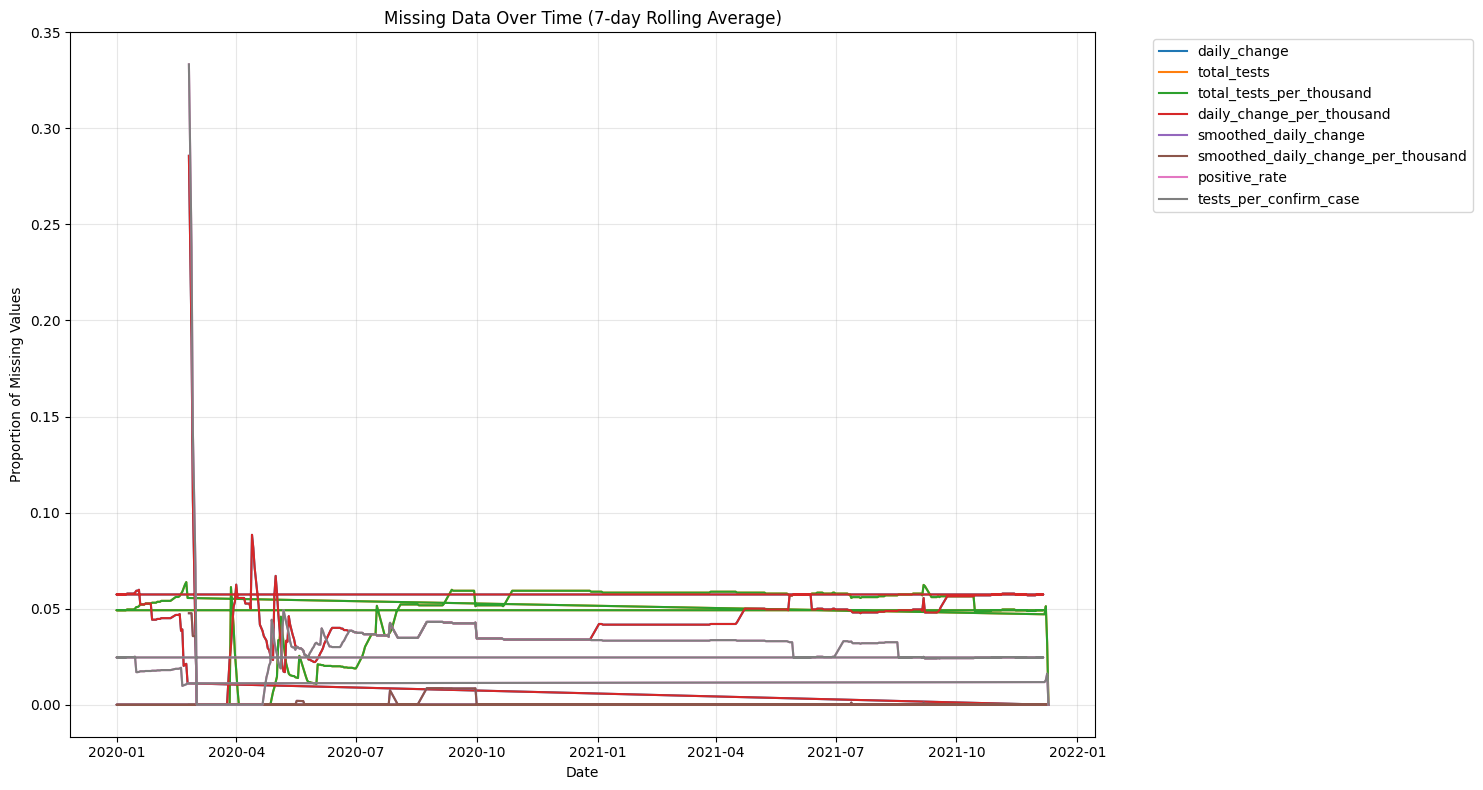

In [3]:
# Plot missing data over time for covid19_testing_record (from Q1_with_eda.ipynb)
metrics = ['daily_change', 'total_tests', 'total_tests_per_thousand', 
           'daily_change_per_thousand', 'smoothed_daily_change', 
           'smoothed_daily_change_per_thousand', 'positive_rate', 
           'tests_per_confirm_case']

plt.figure(figsize=(15, 8))

for metric in metrics:
    missing_mask = covid19_testing_record[metric].isna()
    rolling_missing = missing_mask.rolling(window=7, min_periods=1).mean()
    plt.plot(covid19_testing_record['date'].unique(), 
             rolling_missing.groupby(covid19_testing_record['date']).mean(),
             label=metric)

plt.title('Missing Data Over Time (7-day Rolling Average)')
plt.xlabel('Date')
plt.ylabel('Proportion of Missing Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

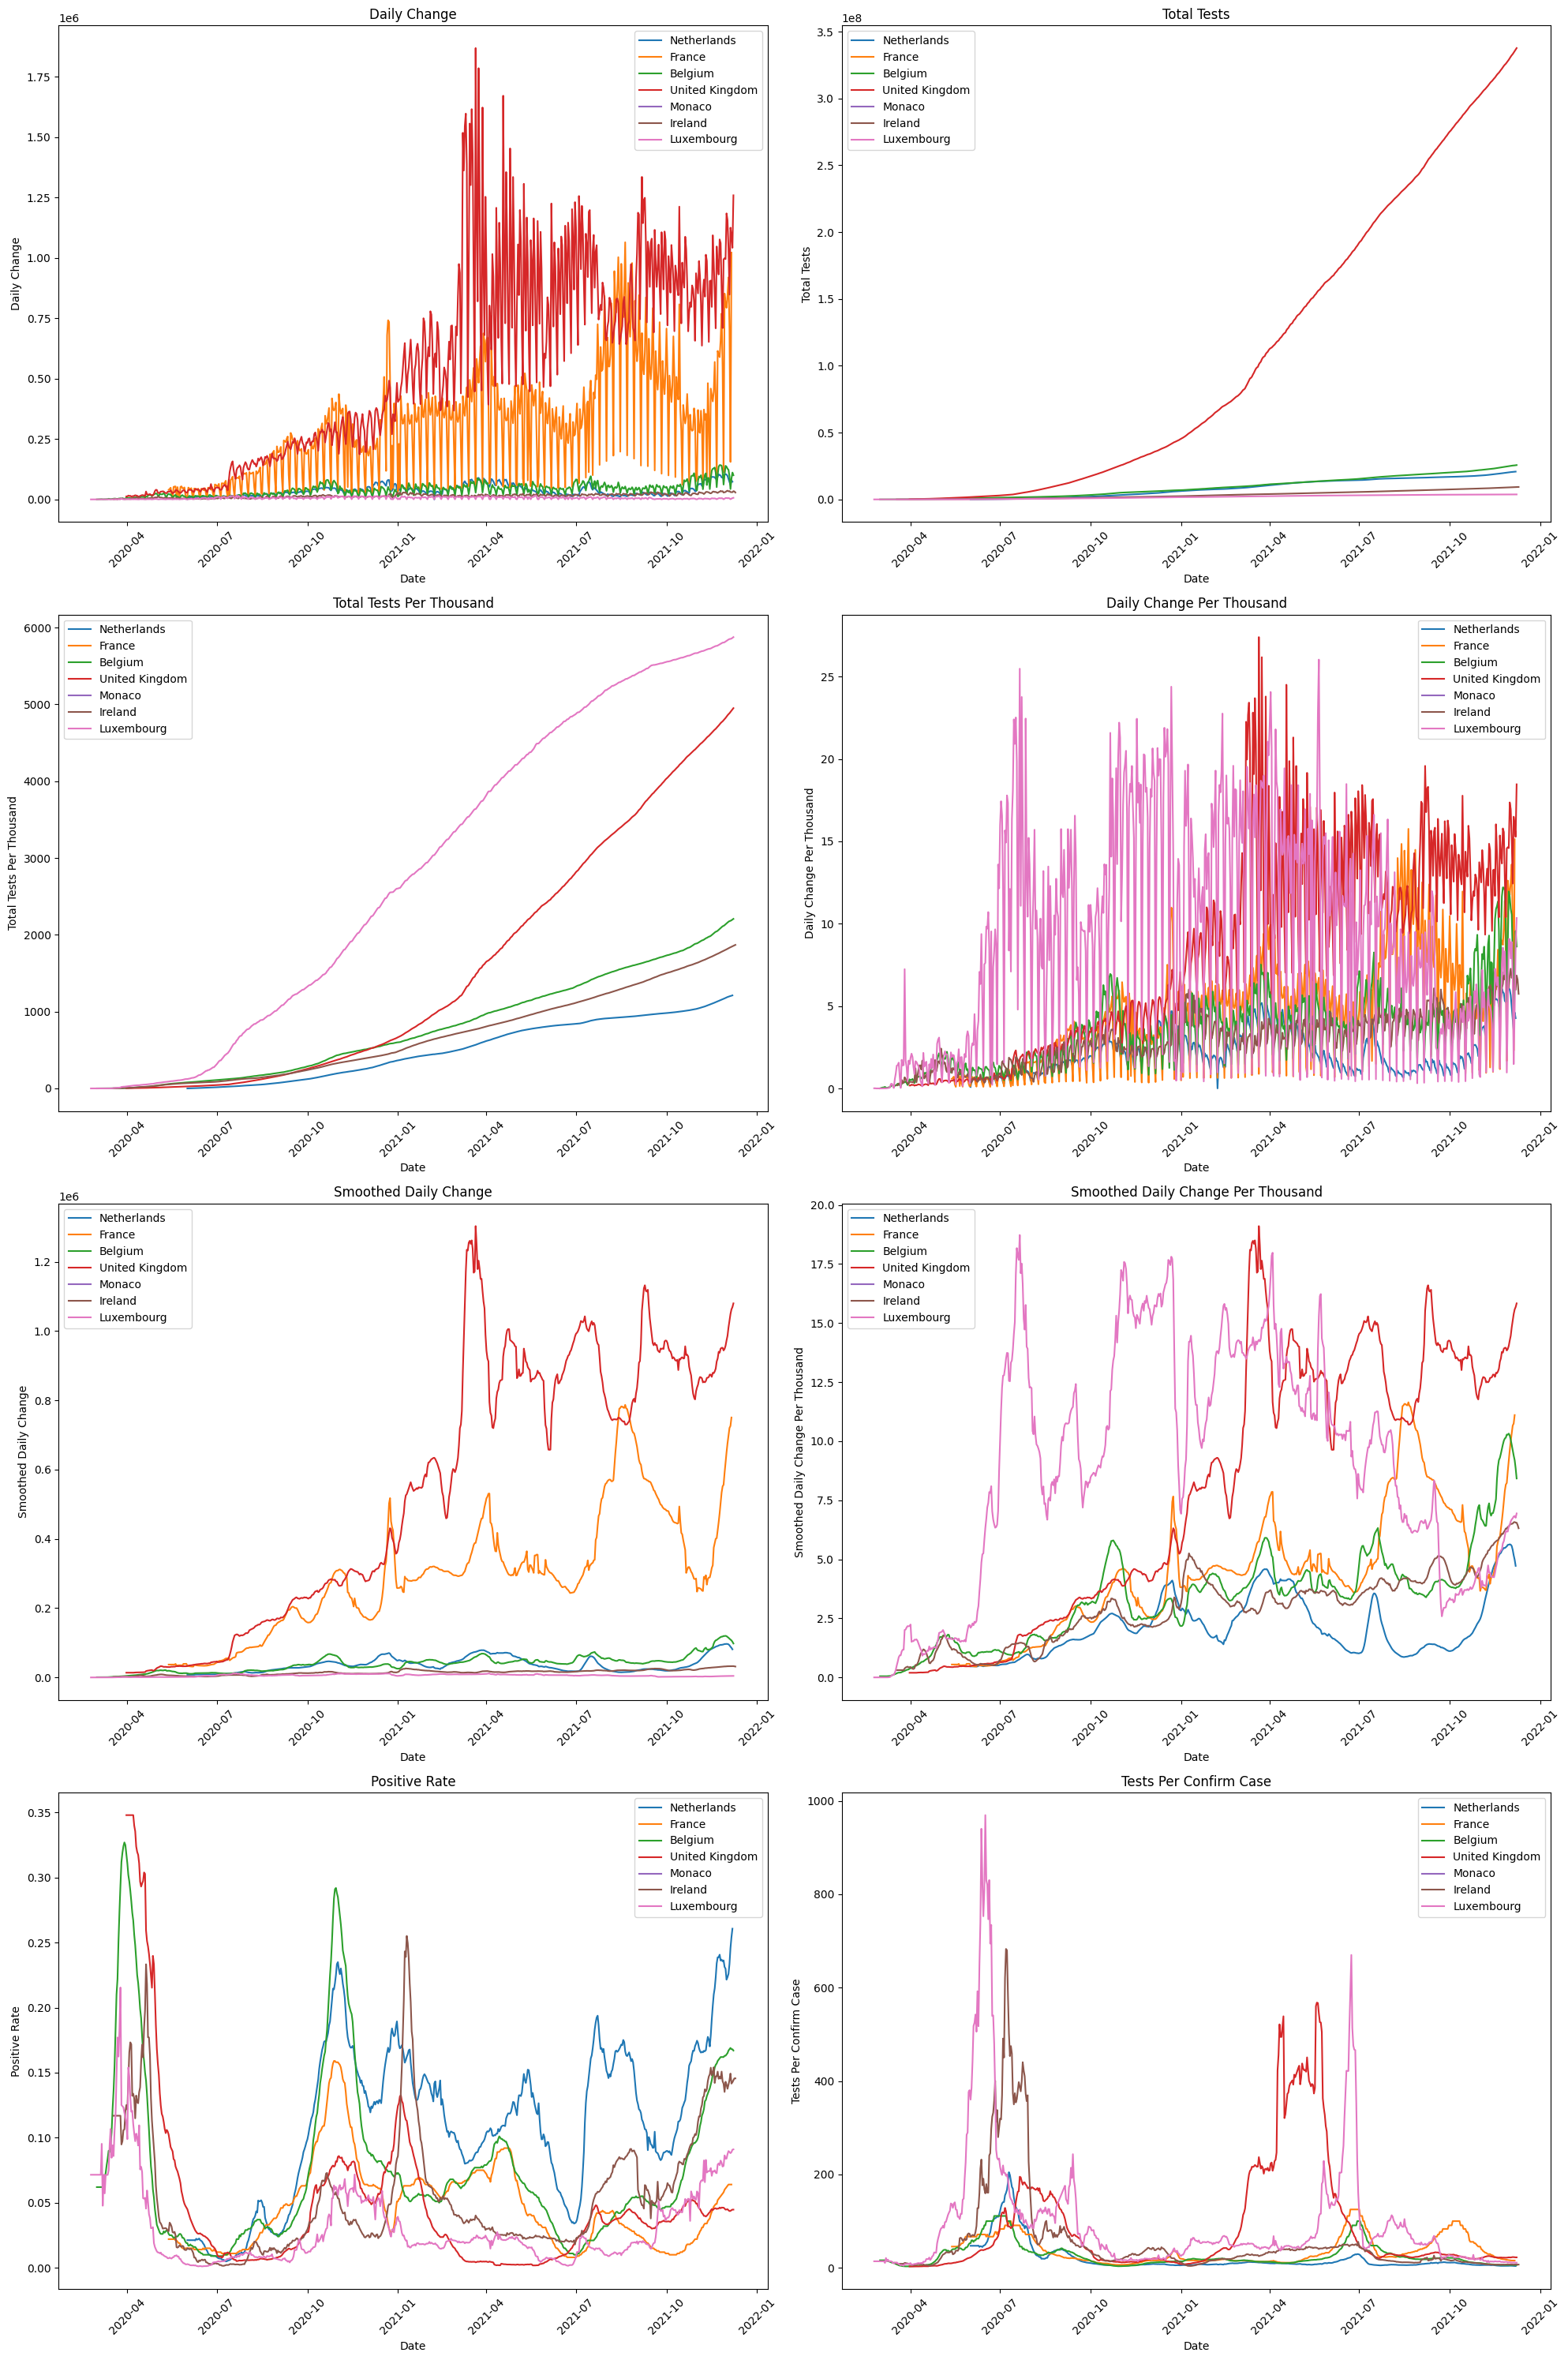

In [4]:
# Plot covid19_testing_record metrics for Western Europe (from Q1_with_eda.ipynb)
def plot_covid19_testing_record(data, countries):
    metrics = ['daily_change', 'total_tests', 'total_tests_per_thousand', 
               'daily_change_per_thousand', 'smoothed_daily_change', 
               'smoothed_daily_change_per_thousand', 'positive_rate', 
               'tests_per_confirm_case']
    
    fig, axes = plt.subplots(4, 2, figsize=(20, 30))
    axes = axes.ravel()
    
    for idx, metric in enumerate(metrics):
        for country in countries:
            country_data = data[data['country'] == country]
            axes[idx].plot(country_data['date'], country_data[metric], label=country)
            axes[idx].set_title(f'{metric.replace("_", " ").title()}')
            axes[idx].set_xlabel('Date')
            axes[idx].set_ylabel(metric.replace('_', ' ').title())
            axes[idx].legend()
            axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
countries = dataloader.western_europe_countries
plot_covid19_testing_record(covid19_testing_record, countries)

In [5]:
# Plot missing data over time for vaccinations_by_country (from Q1_with_eda.ipynb)
metrics = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
          'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred',
          'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 
          'daily_vaccinations_per_million']

plt.figure(figsize=(15, 8))

for metric in metrics:
    missing_mask = vaccinations_by_country[metric].isna()
    rolling_missing = missing_mask.rolling(window=7, min_periods=1).mean()
    plt.plot(vaccinations_by_country['date'].unique(), 
             rolling_missing.groupby(vaccinations_by_country['date']).mean(),
             label=metric)

plt.title('Vaccination Data Missing Values Over Time (7-day Rolling Average)')
plt.xlabel('Date')
plt.ylabel('Proportion of Missing Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

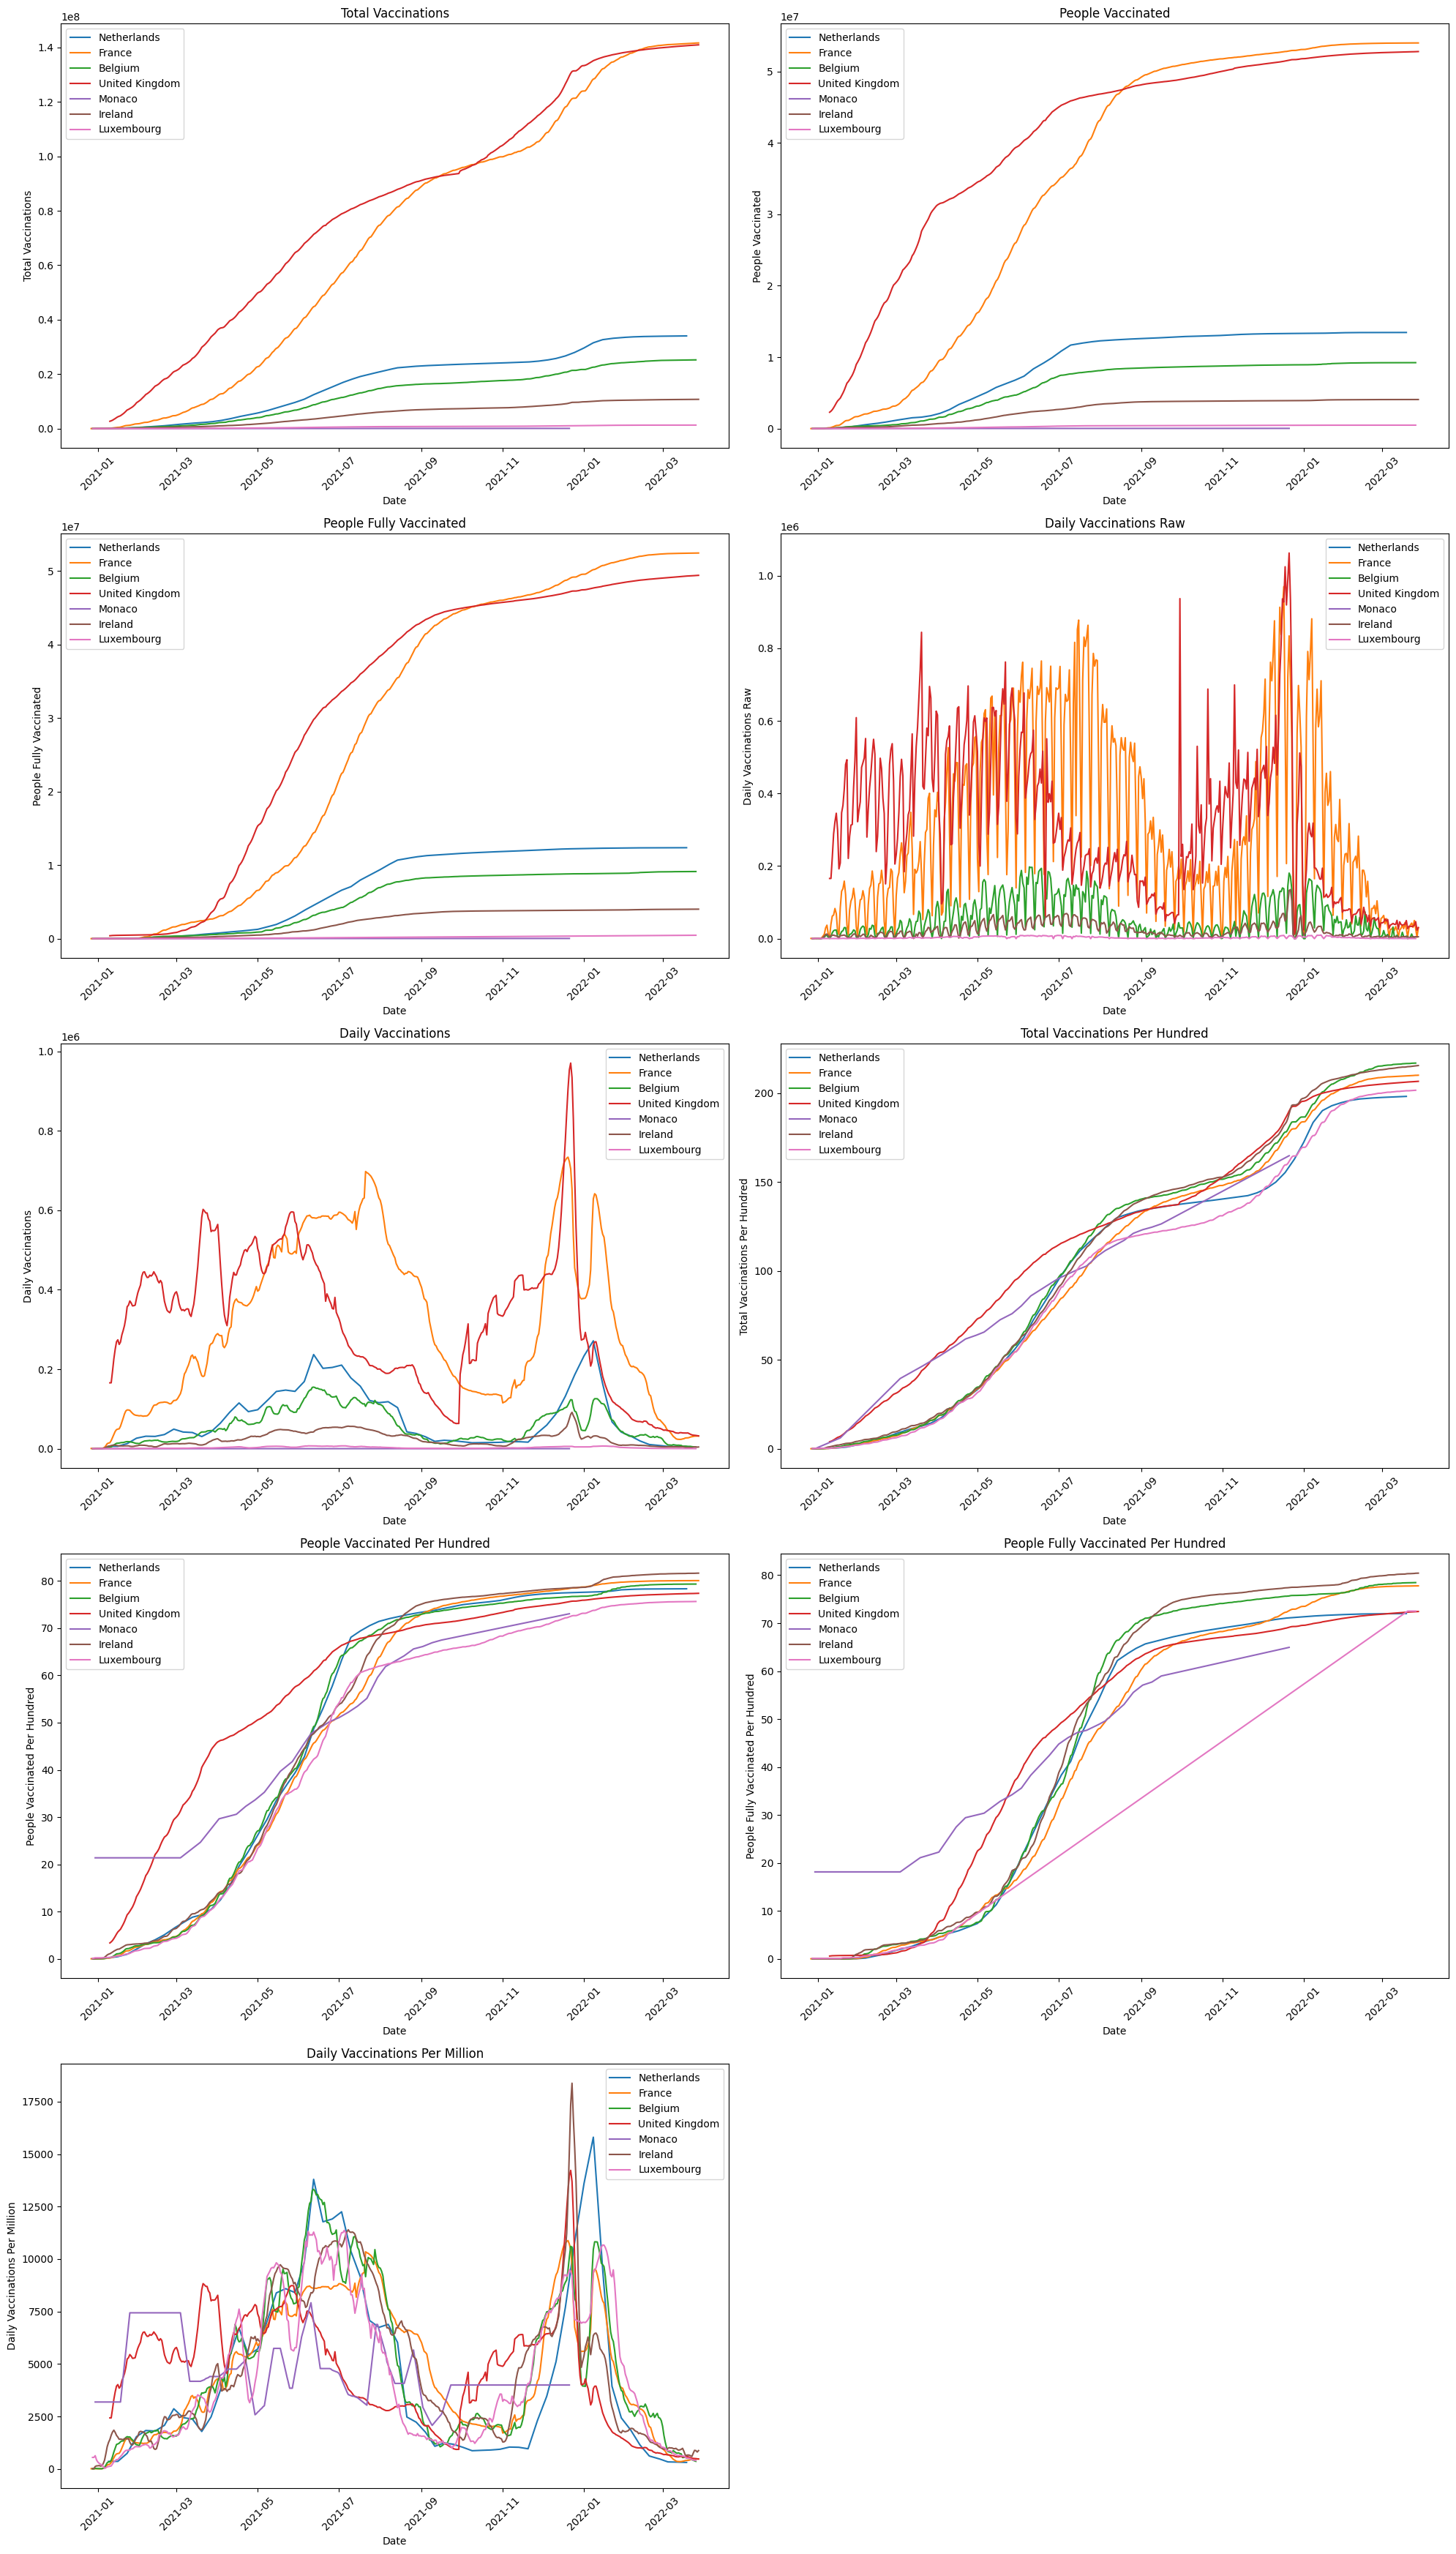

In [6]:
# Plot vaccinations_by_country metrics for Western Europe (from Q1_with_eda.ipynb)
def plot_vaccinations_by_country(data, countries):
    metrics = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
              'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred',
              'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 
              'daily_vaccinations_per_million']
    
    fig, axes = plt.subplots(5, 2, figsize=(20, 35))
    axes = axes.ravel()
    
    for idx, metric in enumerate(metrics):
        for country in countries:
            country_data = data[data['country'] == country]
            axes[idx].plot(country_data['date'], country_data[metric], label=country)
            axes[idx].set_title(f'{metric.replace("_", " ").title()}')
            axes[idx].set_xlabel('Date')
            axes[idx].set_ylabel(metric.replace('_', ' ').title())
            axes[idx].legend()
            axes[idx].tick_params(axis='x', rotation=45)
    
    axes[-1].set_visible(False)
    plt.tight_layout()
    plt.show()

countries = dataloader.western_europe_countries
plot_vaccinations_by_country(vaccinations_by_country, countries)

In [7]:
# Analyze date differences (from Q1_with_eda.ipynb)
def analyze_date_differences(df, name):
    print(f"\nAnalyzing date differences for {name}")
    
    for country in df['country'].unique():
        country_data = df[df['country'] == country].copy()
        country_data.sort_values(by='date', ascending=False, inplace=True)
        country_data['days_between_records'] = country_data['date'].diff(-1).dt.days
        
        print(f"\nCountry: {country}")
        print("Most common time intervals between records (days):")
        value_counts = country_data['days_between_records'].value_counts().head()
        if not value_counts.empty:
            print(value_counts)
        
        print("\nDate range:")
        print(f"Start: {country_data['date'].min()}")
        print(f"End: {country_data['date'].max()}")
        print(f"Total timespan: {(country_data['date'].max() - country_data['date'].min()).days} days")
        print("-" * 50)

western_europe_data = {
    "COVID-19 Testing Record": covid19_testing_record[covid19_testing_record['is_western_europe']],
    "Vaccinations by Country": vaccinations_by_country[vaccinations_by_country['is_western_europe']]
}

for name, df in western_europe_data.items():
    analyze_date_differences(df, name)


Analyzing date differences for COVID-19 Testing Record

Country: Belgium
Most common time intervals between records (days):
days_between_records
1.0    647
Name: count, dtype: int64

Date range:
Start: 2020-03-01 00:00:00
End: 2021-12-08 00:00:00
Total timespan: 647 days
--------------------------------------------------

Country: France
Most common time intervals between records (days):
days_between_records
1.0    572
Name: count, dtype: int64

Date range:
Start: 2020-05-13 00:00:00
End: 2021-12-06 00:00:00
Total timespan: 572 days
--------------------------------------------------

Country: Ireland
Most common time intervals between records (days):
days_between_records
1.0    632
Name: count, dtype: int64

Date range:
Start: 2020-03-18 00:00:00
End: 2021-12-10 00:00:00
Total timespan: 632 days
--------------------------------------------------

Country: Luxembourg
Most common time intervals between records (days):
days_between_records
1.0    653
Name: count, dtype: int64

Date range

# Q1: Regional Vaccination Analysis

In [8]:
# Scope the countries to western europe (from Q1_with_eda.ipynb)
vaccinations_by_country = vaccinations_by_country[vaccinations_by_country['is_western_europe']]
covid19_testing_record = covid19_testing_record[covid19_testing_record['is_western_europe']]
covid19_variants_found = covid19_variants_found[covid19_variants_found['is_western_europe']]
comprehensive_data = comprehensive_data[comprehensive_data['is_western_europe']]
vaccination_by_manufacturer = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']]

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_28232\1084097451.py:32: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['NAME']):


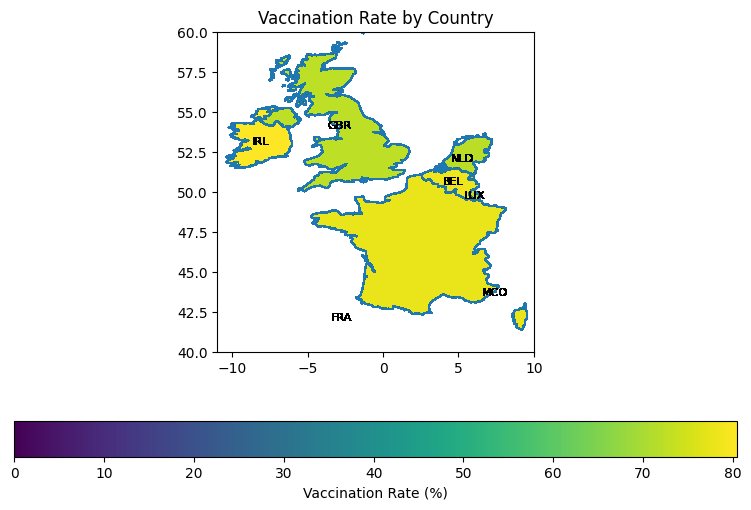

In [9]:
# Geographic plotting of vaccination rates (from Q1_with_eda.ipynb)
import geopandas as gpd
import requests
import os
from io import BytesIO
import matplotlib.cm as cm

country_names = dataloader.western_europe_countries

url = "https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_countries.zip"
response = requests.get(url)
world = gpd.read_file(BytesIO(response.content))

world = world[world['NAME'].isin(country_names)]
world = world.to_crs(epsg=4326)

merged = world.merge(vaccinations_by_country, how="left", left_on="NAME", right_on="country")
merged['vaccination_rate'] = merged['people_fully_vaccinated_per_hundred']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
ax = axs[0, 0]

merged.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='vaccination_rate', ax=ax, legend=True,
        legend_kwds={'label': "Vaccination Rate (%)",
                'orientation': "horizontal"},
        missing_kwds={"color": "lightgrey", "label": "Missing data"})
ax.set_title('Vaccination Rate by Country')
ax.set_xlim(-11, 10)
ax.set_ylim(40, 60)

for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['NAME']): 
        label = label.replace("United Kingdom", "GBR")
        label = label.replace("Ireland", "IRL")
        label = label.replace("Belgium", "BEL")
        label = label.replace("France", "FRA")
        label = label.replace("Luxembourg", "LUX")
        label = label.replace("Monaco", "MCO")
        label = label.replace("Netherlands", "NLD")
        ax.text(x, y, label, fontsize=8, ha='center', va='center')

axs[0, 1].set_visible(False)
axs[1, 0].set_visible(False)
axs[1, 1].set_visible(False)

plt.tight_layout()
plt.show()

Total Population: 170,098,165
Fully Vaccinated: 127,834,782 (75.15%)
Partially Vaccinated: 6,210,838 (3.65%)
Unvaccinated: 36,052,545 (21.20%)

Total Deaths: 468,199


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_28232\2605416825.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vax_group_death_rate = analysis_data.groupby('vax_rate_group')['death_rate'].mean().reset_index()


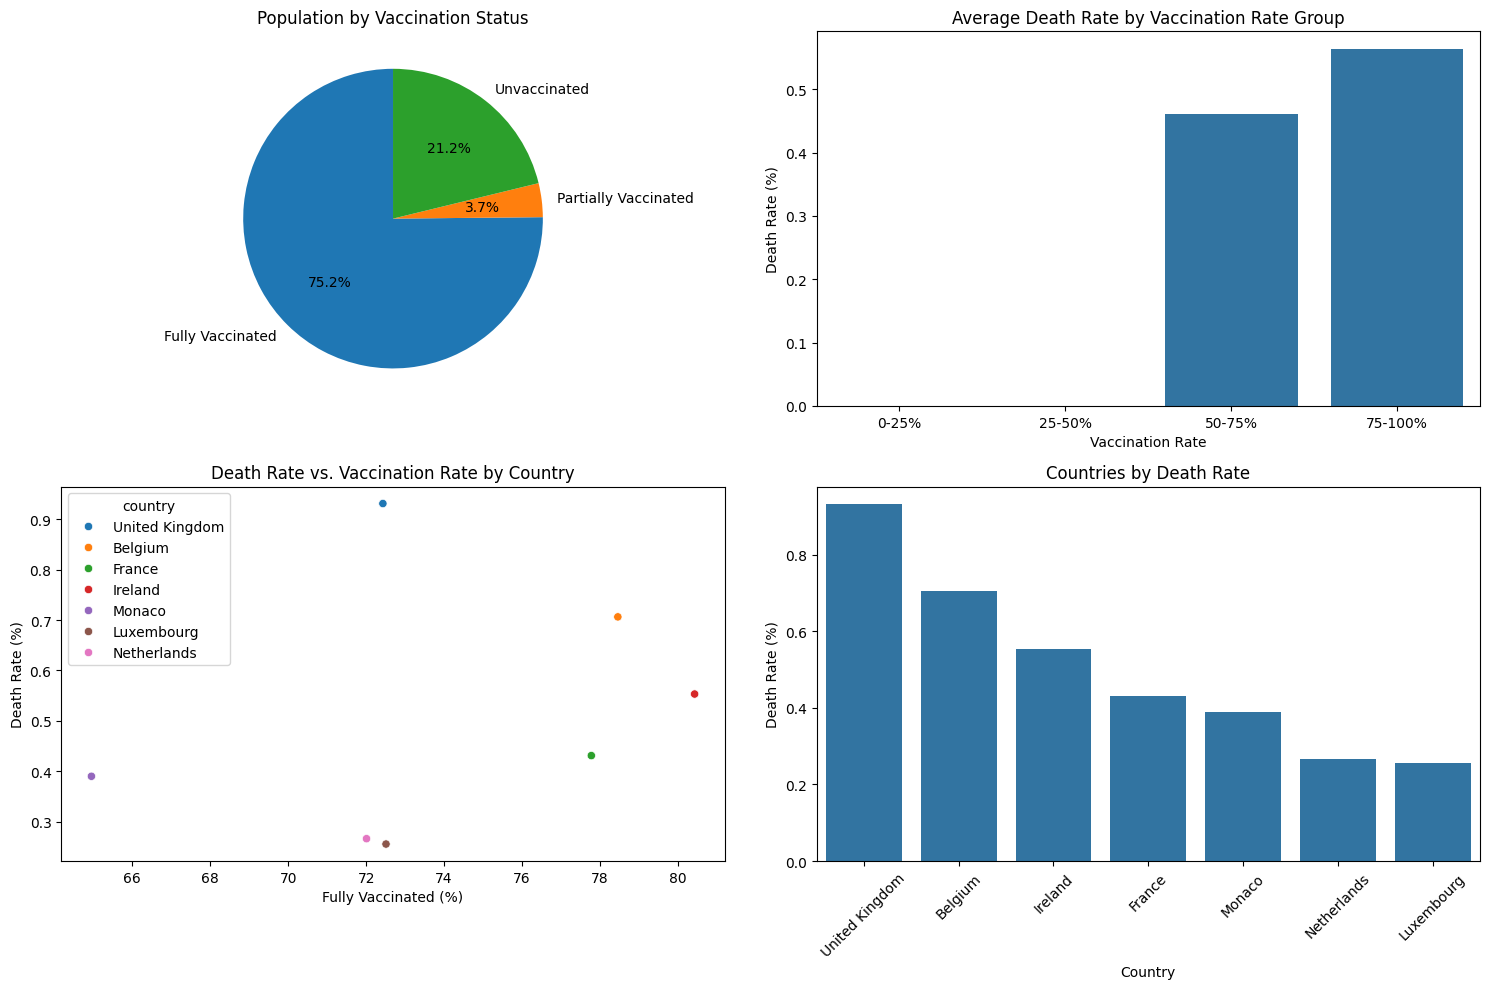

In [10]:
# Calculate vaccinated and unvaccinated populations and their mortality rates (from Q1_with_eda.ipynb)
latest_vax_data = vaccinations_by_country.sort_values('date').groupby('country').last().reset_index()
latest_vax_data = latest_vax_data[['country', 'people_fully_vaccinated_per_hundred', 'people_vaccinated_per_hundred', 'people_vaccinated']]
analysis_data = comprehensive_data.merge(latest_vax_data, on='country', how='left')

analysis_data['estimated_population'] = analysis_data['people_vaccinated'] / (analysis_data['people_vaccinated_per_hundred'] / 100)
analysis_data['fully_vaccinated'] = analysis_data['estimated_population'] * (analysis_data['people_fully_vaccinated_per_hundred'] / 100)
analysis_data['partially_vaccinated'] = analysis_data['estimated_population'] * ((analysis_data['people_vaccinated_per_hundred'] - analysis_data['people_fully_vaccinated_per_hundred']) / 100)
analysis_data['unvaccinated'] = analysis_data['estimated_population'] * (1 - analysis_data['people_vaccinated_per_hundred'] / 100)

analysis_data['partially_vaccinated'] = analysis_data['partially_vaccinated'].clip(lower=0)
analysis_data['unvaccinated'] = analysis_data['unvaccinated'].clip(lower=0)

total_deaths = analysis_data['deaths_cases'].sum()
total_fully_vaccinated = analysis_data['fully_vaccinated'].sum()
total_partially_vaccinated = analysis_data['partially_vaccinated'].sum()
total_unvaccinated = analysis_data['unvaccinated'].sum()
total_population = total_fully_vaccinated + total_partially_vaccinated + total_unvaccinated

print(f"Total Population: {total_population:,.0f}")
print(f"Fully Vaccinated: {total_fully_vaccinated:,.0f} ({total_fully_vaccinated/total_population*100:.2f}%)")
print(f"Partially Vaccinated: {total_partially_vaccinated:,.0f} ({total_partially_vaccinated/total_population*100:.2f}%)")
print(f"Unvaccinated: {total_unvaccinated:,.0f} ({total_unvaccinated/total_population*100:.2f}%)")
print(f"\nTotal Deaths: {total_deaths:,.0f}")

analysis_data['death_rate'] = analysis_data['deaths_cases'] / analysis_data['confirmed_cases'] * 100

bins = [0, 25, 50, 75, 100]
labels = ['0-25%', '25-50%', '50-75%', '75-100%']
analysis_data['vax_rate_group'] = pd.cut(analysis_data['people_fully_vaccinated_per_hundred'], bins=bins, labels=labels)

vax_group_death_rate = analysis_data.groupby('vax_rate_group')['death_rate'].mean().reset_index()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
vaccination_status = ['Fully Vaccinated', 'Partially Vaccinated', 'Unvaccinated']
vaccination_counts = [total_fully_vaccinated, total_partially_vaccinated, total_unvaccinated]
plt.pie(vaccination_counts, labels=vaccination_status, autopct='%1.1f%%', startangle=90)
plt.title('Population by Vaccination Status')

plt.subplot(2, 2, 2)
sns.barplot(x='vax_rate_group', y='death_rate', data=vax_group_death_rate)
plt.title('Average Death Rate by Vaccination Rate Group')
plt.xlabel('Vaccination Rate')
plt.ylabel('Death Rate (%)')

plt.subplot(2, 2, 3)
sns.scatterplot(x='people_fully_vaccinated_per_hundred', y='death_rate', data=analysis_data, hue='country')
plt.title('Death Rate vs. Vaccination Rate by Country')
plt.xlabel('Fully Vaccinated (%)')
plt.ylabel('Death Rate (%)')

plt.subplot(2, 2, 4)
top_death_rate = analysis_data.sort_values('death_rate', ascending=False)
sns.barplot(x='country', y='death_rate', data=top_death_rate)
plt.title('Countries by Death Rate')
plt.xlabel('Country')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: float or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure` or `~matplotlib.figure.SubFigure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 

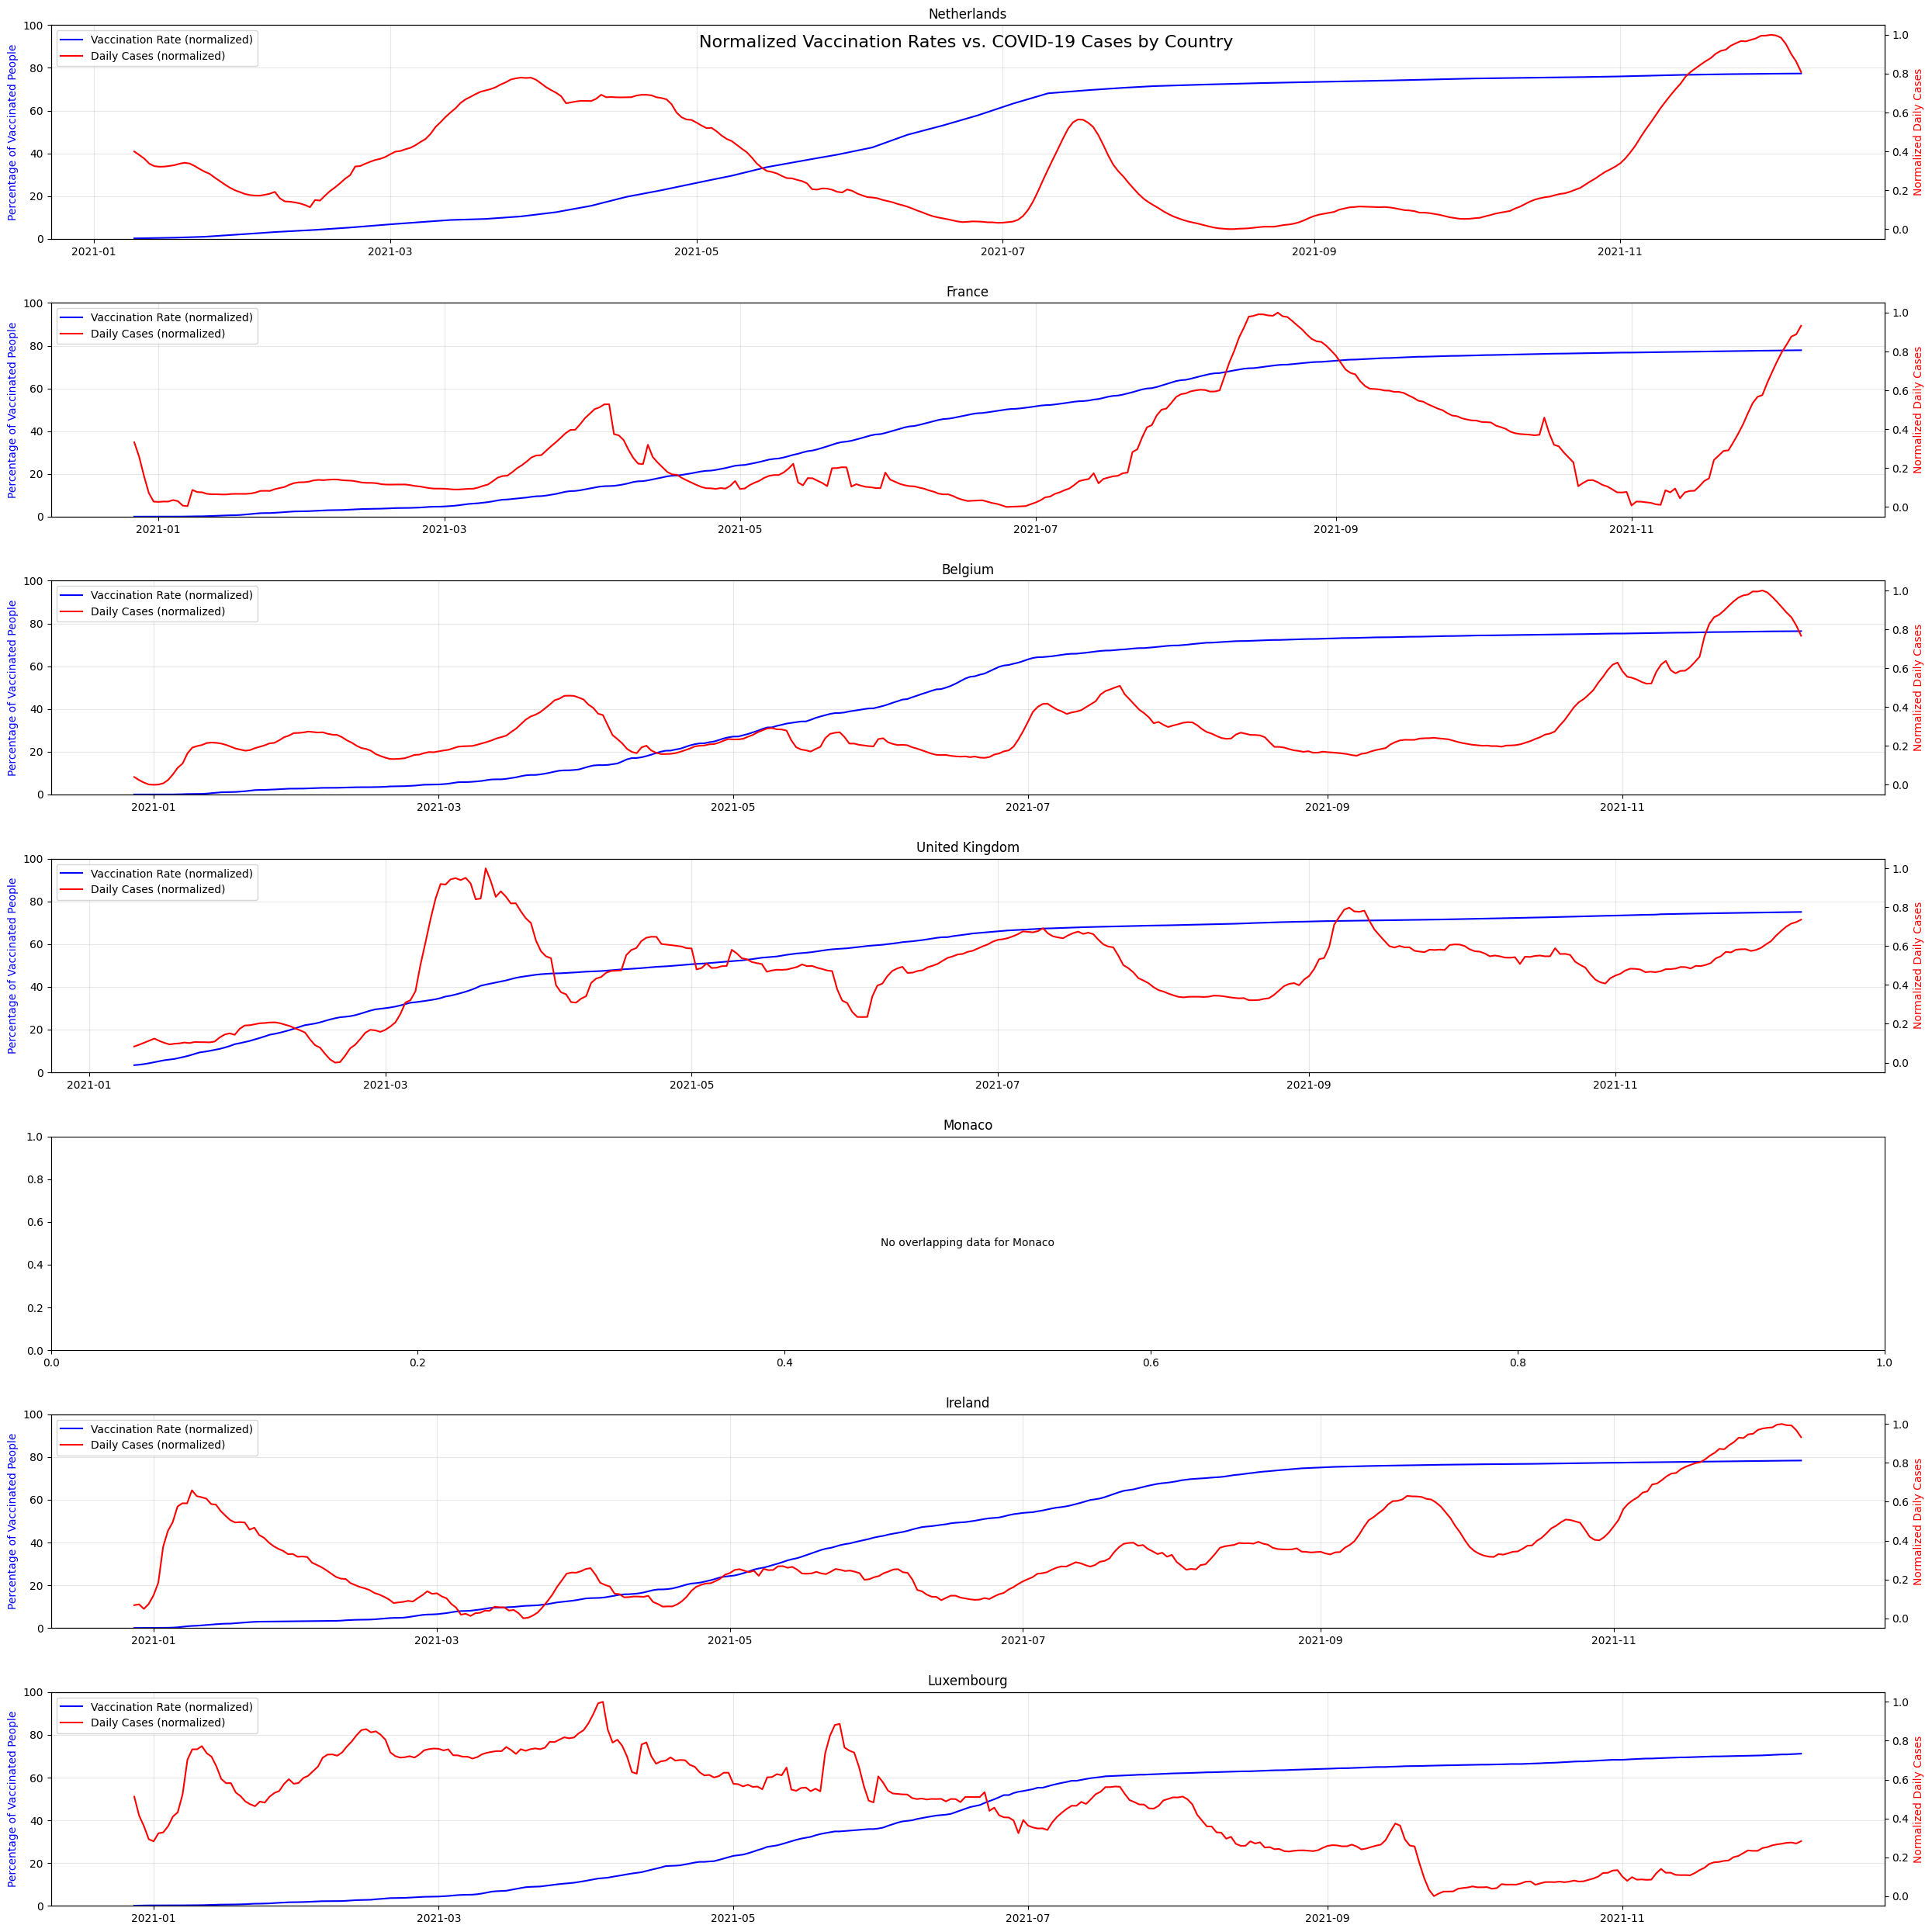

In [11]:
# Time series graph of vaccinated population (normalized) vs covid19 cases (normalized) for each country (from Q1_with_eda.ipynb)
countries = dataloader.western_europe_countries

fig, axs = plt.subplots(7, 1, figsize=(25, 25), sharex=False)

date_format = DateFormatter("%Y-%m")

for i, country in enumerate(countries):
    country_vax = vaccinations_by_country[vaccinations_by_country['country'] == country]
    country_cases = covid19_testing_record[covid19_testing_record['country'] == country]
    
    country_vax = country_vax.set_index('date')
    country_cases = country_cases.set_index('date')
    
    common_dates = country_vax.index.intersection(country_cases.index)
    
    if len(common_dates) > 0:
        country_vax = country_vax.loc[common_dates]
        country_cases = country_cases.loc[common_dates]
        vax_data = country_vax['people_vaccinated'].values
        vax_norm = vax_data / analysis_data[analysis_data['country'] == country]['estimated_population'].values[0] * 100

        case_data = country_cases['smoothed_daily_change'].values
        case_norm = (case_data - np.min(case_data)) / (np.max(case_data) - np.min(case_data) + 1e-10)
        
        ax1 = axs[i]
        ln1 = ax1.plot(common_dates, vax_norm, 'b-', label='Vaccination Rate (normalized)')
        
        ax1.set_ylim(0, 100)
        
        ax2 = ax1.twinx()
        ln2 = ax2.plot(common_dates, case_norm, 'r-', label='Daily Cases (normalized)')
        
        ax1.set_title(f'{country}')
        ax1.set_ylabel('Percentage of Vaccinated People', color='b')
        ax2.set_ylabel('Normalized Daily Cases', color='r')
        
        lns = ln1 + ln2
        labs = [l.get_label() for l in lns]
        ax1.legend(lns, labs, loc='upper left')
        
        ax1.xaxis.set_major_formatter(date_format)
        plt.setp(ax1.xaxis.get_majorticklabels())
        
        ax1.grid(True, alpha=0.3)
    else:
        axs[i].text(0.5, 0.5, f'No overlapping data for {country}', 
                    horizontalalignment='center', verticalalignment='center')
        axs[i].set_title(f'{country}')

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.suptitle('Normalized Vaccination Rates vs. COVID-19 Cases by Country', fontsize=16)
plt.show()

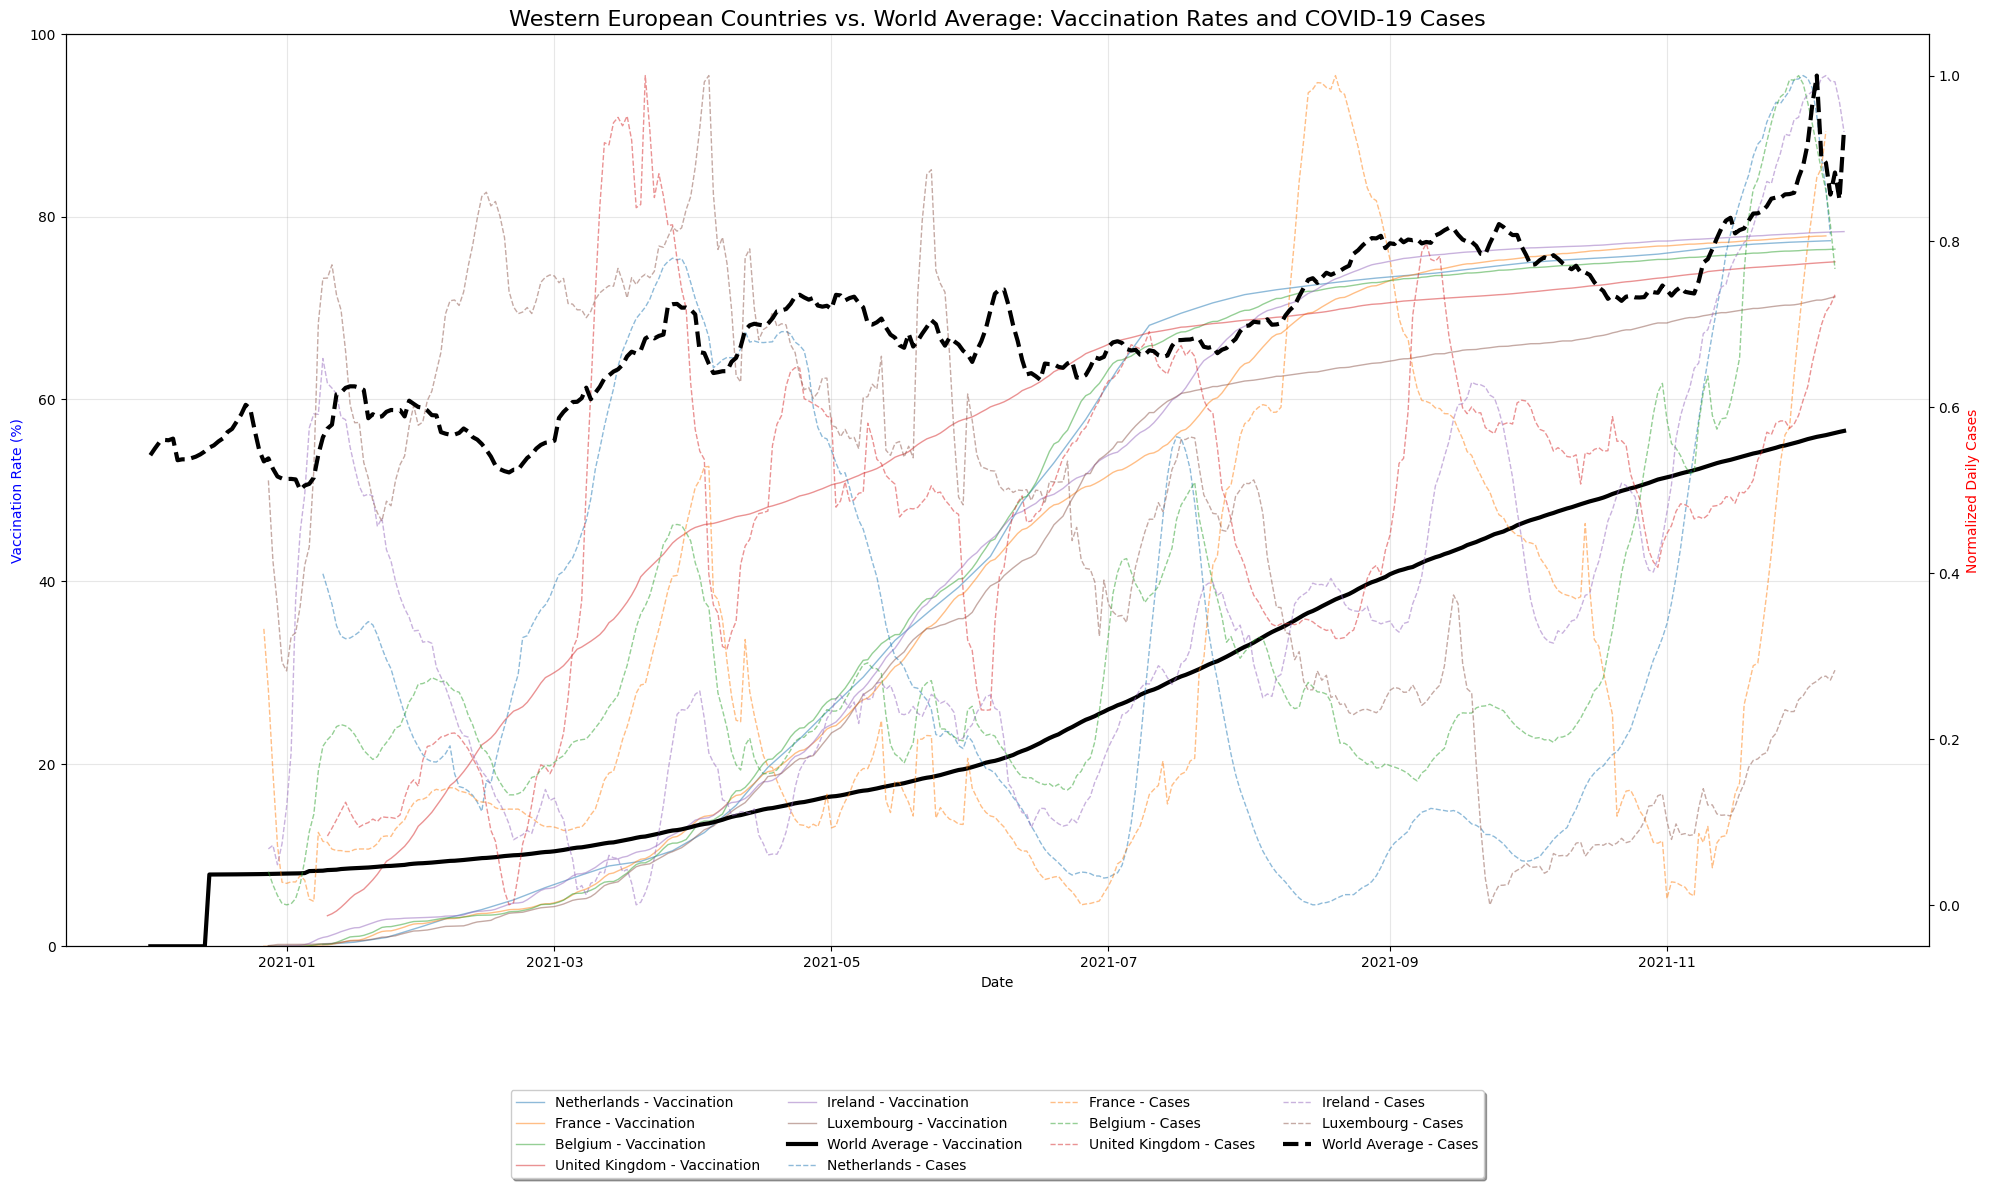

In [12]:
# Western European Countries vs. World Average: Vaccination Rates and COVID-19 Cases (from Q1_with_eda.ipynb)
all_data = Dataloader(data_dir="data/").load_all()
all_vaccinations = all_data["vaccinations_by_country"]
all_covid_testing = all_data["covid19_testing_record"]

countries = dataloader.western_europe_countries

plt.figure(figsize=(20, 12))

date_format = DateFormatter("%Y-%m")

world_vax_by_date = all_vaccinations.groupby('date')['people_vaccinated'].sum()
world_pop_estimate = all_vaccinations.sort_values('date').groupby('country').last()
world_pop_estimate['estimated_population'] = world_pop_estimate['people_vaccinated'] / (world_pop_estimate['people_vaccinated_per_hundred'] / 100)
total_world_pop = world_pop_estimate['estimated_population'].sum()

world_vax_rate = world_vax_by_date / total_world_pop * 100

world_cases_by_date = all_covid_testing.groupby('date')['smoothed_daily_change'].mean()
world_cases_norm = (world_cases_by_date - world_cases_by_date.min()) / (world_cases_by_date.max() - world_cases_by_date.min() + 1e-10)

ax1 = plt.gca()
ax2 = ax1.twinx()

for country in countries:
    country_vax = vaccinations_by_country[vaccinations_by_country['country'] == country]
    country_cases = covid19_testing_record[covid19_testing_record['country'] == country]
    
    country_vax = country_vax.set_index('date')
    country_cases = country_cases.set_index('date')
    
    common_dates = country_vax.index.intersection(country_cases.index)
    
    if len(common_dates) > 0:
        country_vax = country_vax.loc[common_dates]
        country_cases = country_cases.loc[common_dates]
        
        vax_data = country_vax['people_vaccinated'].values
        vax_norm = vax_data / analysis_data[analysis_data['country'] == country]['estimated_population'].values[0] * 100

        case_data = country_cases['smoothed_daily_change'].values
        case_norm = (case_data - np.min(case_data)) / (np.max(case_data) - np.min(case_data) + 1e-10)

        ax1.plot(common_dates, vax_norm, alpha=0.5, linewidth=1, label=f'{country} - Vaccination')
        
        ax2.plot(common_dates, case_norm, alpha=0.5, linewidth=1, linestyle='--', label=f'{country} - Cases')

world_common_dates = world_vax_rate.index.intersection(world_cases_norm.index)

if len(world_common_dates) > 0:
    world_vax_line = ax1.plot(world_common_dates, world_vax_rate.loc[world_common_dates], 
                  'k-', linewidth=3, label='World Average - Vaccination')
    
    world_case_line = ax2.plot(world_common_dates, world_cases_norm.loc[world_common_dates], 
                   'k--', linewidth=3, label='World Average - Cases')

ax1.set_xlabel('Date')
ax1.set_ylabel('Vaccination Rate (%)', color='blue')
ax2.set_ylabel('Normalized Daily Cases', color='red')
plt.title('Western European Countries vs. World Average: Vaccination Rates and COVID-19 Cases', fontsize=16)

ax1.set_ylim(0, 100)

ax1.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=4, fontsize=10)

ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# Clean COVID testing data (from Q1_with_eda.ipynb)
def clean_covid_testing_data(covid_data, countries):
    date_groups = covid_data.groupby('date')
    complete_dates = []
    
    for date, group in date_groups:
        countries_in_group = set(group['country'].unique())
        if all(country in countries_in_group for country in countries):
            countries_data = group[group['country'].isin(countries)]
            metrics_to_check = ['smoothed_daily_change']
            has_missing = False
            
            for metric in metrics_to_check:
                if metric in countries_data.columns and countries_data[metric].isna().any():
                    has_missing = True
                    break
            
            if not has_missing:
                complete_dates.append(date)
    
    clean_data = covid_data[covid_data['date'].isin(complete_dates)]
    
    print(f"Original dataset had {len(covid_data['date'].unique())} unique dates")
    print(f"Cleaned dataset has {len(complete_dates)} unique dates")
    print(f"Removed {len(covid_data['date'].unique()) - len(complete_dates)} dates with incomplete data")
    
    return clean_data

covid19_testing_record = clean_covid_testing_data(covid19_testing_record, {'Belgium', 'France', 'Ireland', 'Luxembourg', 'Netherlands', 'United Kingdom'})

Original dataset had 656 unique dates
Cleaned dataset has 554 unique dates
Removed 102 dates with incomplete data


Average daily change in COVID-19 cases in Western Europe:
          date   daily_change
0   2020-06-01    8282.833333
1   2020-06-02   18090.166667
2   2020-06-03   18790.000000
3   2020-06-04   18024.000000
4   2020-06-05   19012.833333
..         ...            ...
549 2021-12-02  377790.500000
550 2021-12-03  367047.000000
551 2021-12-04  293354.833333
552 2021-12-05  235782.333333
553 2021-12-06  385562.333333

[554 rows x 2 columns]


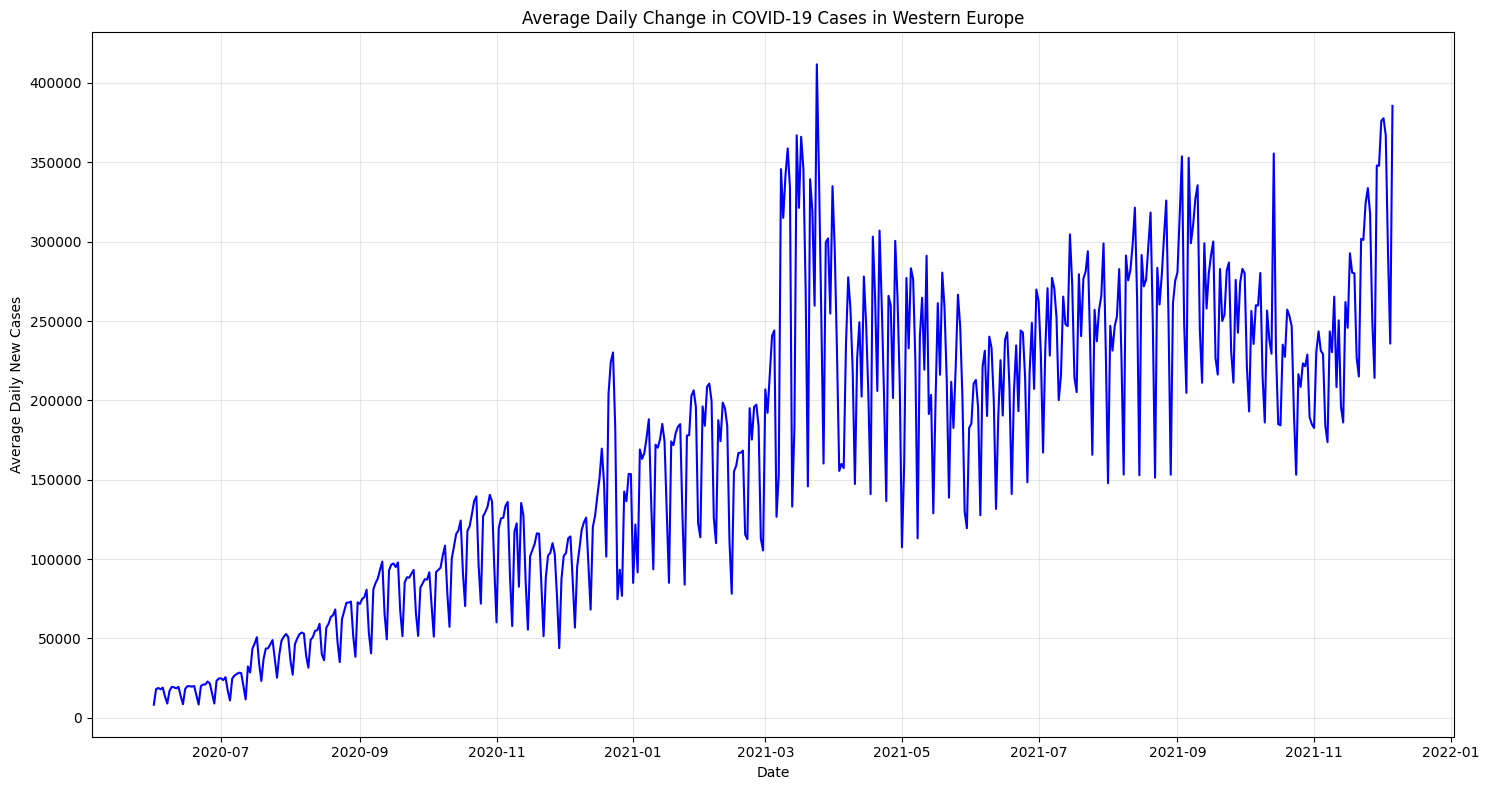

In [14]:
# Average Daily Change in COVID-19 Cases in Western Europe (from Q1_with_eda.ipynb)
western_cases = covid19_testing_record[covid19_testing_record['country'].isin(countries)]
plt.figure(figsize=(15, 8))
daily_case_avg = western_cases.groupby('date')['daily_change'].mean().reset_index()
plt.plot(daily_case_avg['date'], daily_case_avg['daily_change'], label='Western Europe - Daily Change', color='blue')
plt.title('Average Daily Change in COVID-19 Cases in Western Europe')
plt.xlabel('Date')
plt.ylabel('Average Daily New Cases')
plt.grid(True, alpha=0.3)
plt.tight_layout()

print("Average daily change in COVID-19 cases in Western Europe:")
print(daily_case_avg)

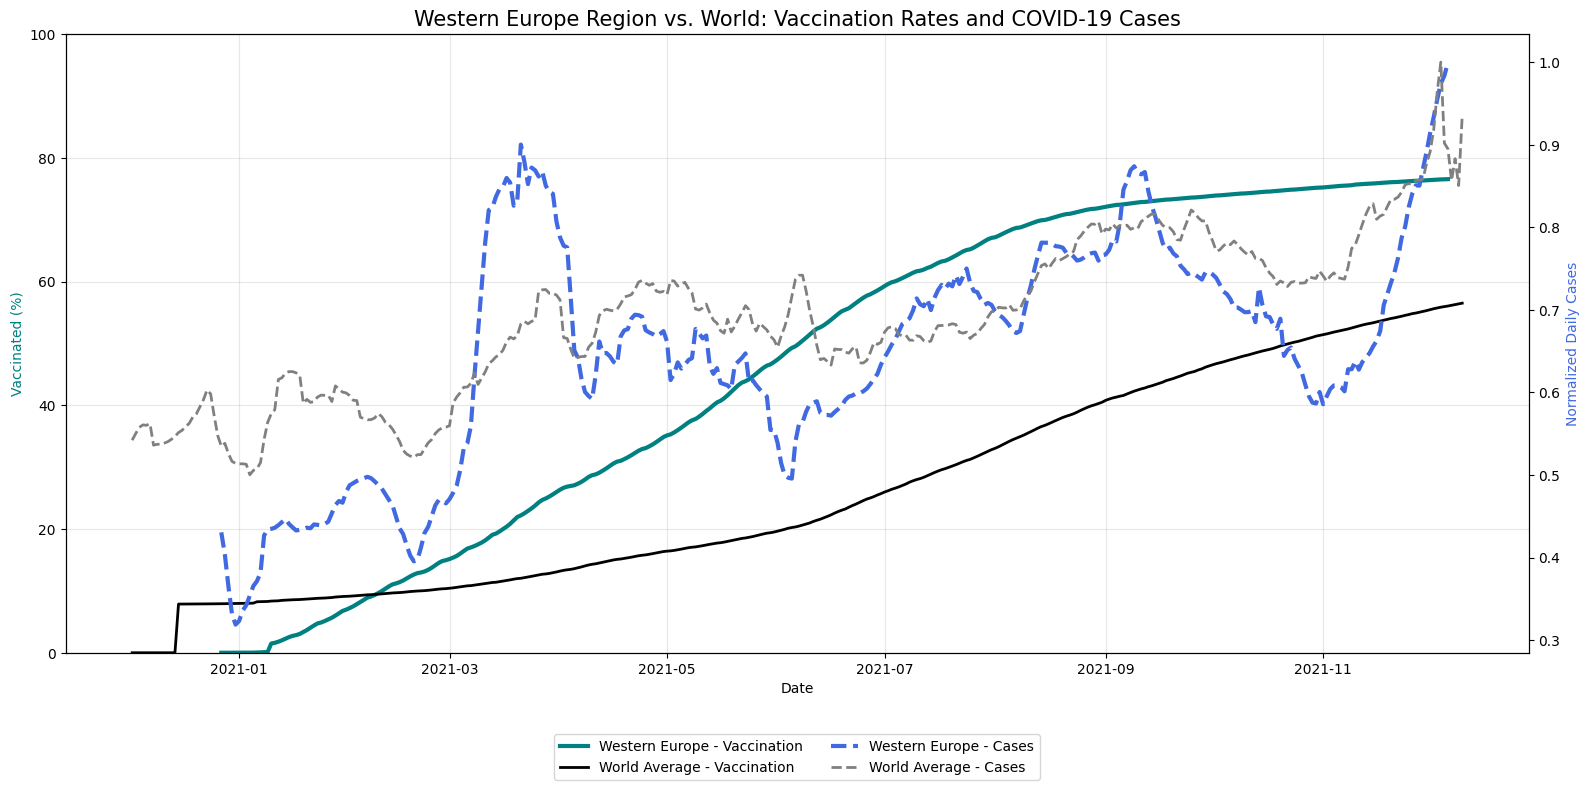

In [15]:
# Western Europe Region vs. World: Vaccination Rates and COVID-19 Cases (from Q1_with_eda.ipynb)
western_vax = vaccinations_by_country[vaccinations_by_country['country'].isin(countries)]
western_cases = covid19_testing_record[covid19_testing_record['country'].isin(countries)]

region_vax_by_date = western_vax.groupby('date')['people_vaccinated'].sum()

western_europe_pop = sum(analysis_data[analysis_data['country'].isin(countries)]['estimated_population'])

region_vax_rate = region_vax_by_date / western_europe_pop * 100
region_vax_rate = region_vax_rate.clip(upper=100)

region_cases_by_date = western_cases.groupby('date')['smoothed_daily_change'].mean()
region_cases_norm = (region_cases_by_date - region_cases_by_date.min()) / (region_cases_by_date.max() - region_cases_by_date.min() + 1e-10)

region_common_dates = region_vax_rate.index.intersection(region_cases_norm.index)
world_common_dates = world_vax_rate.index.intersection(world_cases_norm.index)

plt.figure(figsize=(16, 8))
ax1 = plt.gca()
ax2 = ax1.twinx()

if len(region_common_dates) > 0:
    ax1.plot(region_common_dates, region_vax_rate.loc[region_common_dates], color='teal', linewidth=3, label='Western Europe - Vaccination')
    ax2.plot(region_common_dates, region_cases_norm.loc[region_common_dates], color='royalblue', linewidth=3, linestyle='--', label='Western Europe - Cases')

if len(world_common_dates) > 0:
    ax1.plot(world_common_dates, world_vax_rate.loc[world_common_dates], color='black', linewidth=2, label='World Average - Vaccination')
    ax2.plot(world_common_dates, world_cases_norm.loc[world_common_dates], color='gray', linewidth=2, linestyle='--', label='World Average - Cases')

ax1.set_xlabel('Date')
ax1.set_ylabel('Vaccinated (%)', color='teal')
ax2.set_ylabel('Normalized Daily Cases', color='royalblue')
plt.title('Western Europe Region vs. World: Vaccination Rates and COVID-19 Cases', fontsize=15)
ax1.set_ylim(0, 100)
ax1.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, fontsize=10)
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Vaccine Effectiveness Index (VEI)

The Vaccine Effectiveness Index (VEI) is a custom metric we developed to evaluate the success of vaccination programs in Western Europe. It's based on the vaccine efficacy formula using **relative risk** (see further: https://en.wikipedia.org/wiki/Vaccine_efficacy and https://en.wikipedia.org/wiki/Relative_risk_reduction). Initially, we wanted to use the mortality rate, but it's impossible to obtain it as the database lacks its presence. Thus, we assume that an infected patient that shows symptoms is equivalent to a vaccine not being effective.

### Formula
$$VEI = \left(1 - RR \right)\times {100}$$

Where $RR$ is Relative Risk
### Modified Formula

$$VEI = \left(1 - \frac{infection\_rate}{max(infection\_rate)}\right) \times \frac{vaccination\_rate}{100}$$

Where:

- $infection\_rate$ is the daily COVID-19 case rate per population 
    - $infection\_rate = \frac{I}{N}\times 100$ Where $I$ is Number of infected patients and $N$ is population

- $max(infection\_rate)$ is the maximum observed infection rate in the analysis period

- $vaccination\_rate$ is the percentage of population vaccinated



This formula produces a score where:

- Higher values = better vaccine effectiveness (high vaccination rate + low infection rate)

- Lower values = worse vaccine effectiveness (low vaccination rate + high infection rate)



### VEI Categories

- **Excellent**: 0.6-1

- **Very Good**: 0.4-0.6

- **Good**: 0.2-0.4

- **Fair**: 0.1-0.2

- **Poor**: 0-0.1

Average Vaccine Effectiveness Index (VEI) for Western Europe: 0.13 (Fair)
Average Vaccine Effectiveness Index (VEI) for World: 0.07 (Poor)


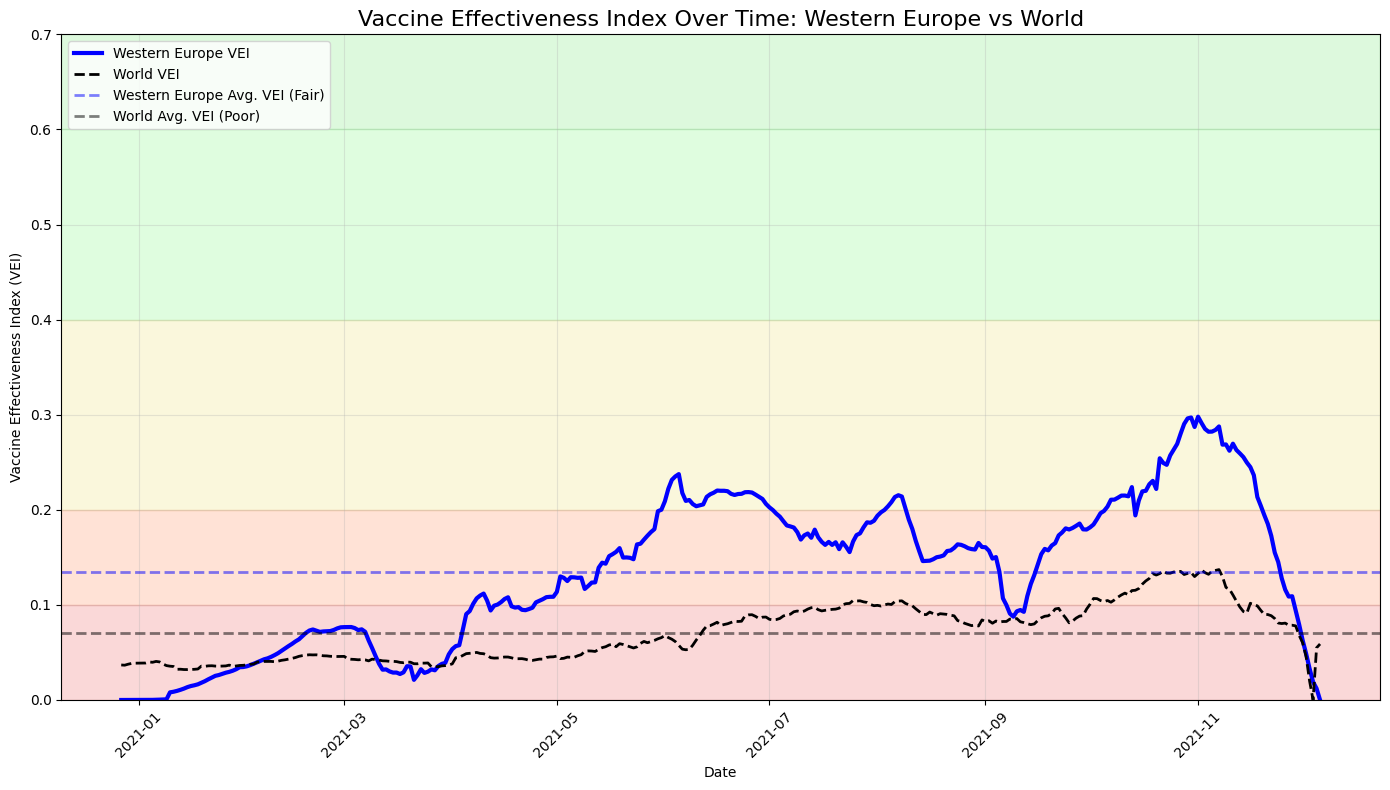

In [16]:
# Calculate and plot VEI over time (from Q1_with_eda.ipynb)
common_dates = region_vax_rate.index.intersection(region_cases_by_date.index)

vei_data = pd.DataFrame(index=common_dates)

vei_data['western_europe_vax_rate'] = region_vax_rate.loc[common_dates]
vei_data['western_europe_infection_rate'] = region_cases_by_date.loc[common_dates] / western_europe_pop * 100
vei_data['western_europe_vei'] = (1 - vei_data['western_europe_infection_rate'] / vei_data['western_europe_infection_rate'].max()) * vei_data['western_europe_vax_rate'] / 100

world_common_dates = vei_data.index.intersection(world_vax_rate.index.intersection(world_cases_by_date.index))
vei_data.loc[world_common_dates, 'world_vax_rate'] = world_vax_rate.loc[world_common_dates]
vei_data.loc[world_common_dates, 'world_infection_rate'] = world_cases_by_date.loc[world_common_dates] / total_world_pop * 100
vei_data.loc[world_common_dates, 'world_vei'] = (1 - vei_data.loc[world_common_dates, 'world_infection_rate'] / vei_data.loc[world_common_dates, 'world_infection_rate'].max()) * vei_data.loc[world_common_dates, 'world_vax_rate'] / 100

def categorize_vei(vei_score):
    if vei_score >= 0.6:
        return "Excellent"
    elif vei_score >= 0.4:
        return "Very Good"
    elif vei_score >= 0.2:
        return "Good"
    elif vei_score >= 0.1:
        return "Fair"
    else:
        return "Poor"

latest_date = vei_data.index.max()
western_europe_mean_vei = vei_data['western_europe_vei'].mean()
world_mean_vei = vei_data['world_vei'].mean()

plt.figure(figsize=(14, 8))
plt.plot(vei_data.index, vei_data['western_europe_vei'], 'b-', linewidth=3, label='Western Europe VEI')
plt.plot(vei_data.index, vei_data['world_vei'], 'k--', linewidth=2, label='World VEI')
plt.grid(True, alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Vaccine Effectiveness Index (VEI)')
plt.title('Vaccine Effectiveness Index Over Time: Western Europe vs World', fontsize=16)

date_format = DateFormatter("%Y-%m")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

categories = [
    {"name": "Excellent", "min": 0.6, "color": "lightgreen", "alpha": 0.3},
    {"name": "Very Good", "min": 0.4, "max": 0.6, "color": "palegreen", "alpha": 0.3},
    {"name": "Good", "min": 0.2, "max": 0.4, "color": "khaki", "alpha": 0.3},
    {"name": "Fair", "min": 0.1, "max": 0.2, "color": "lightsalmon", "alpha": 0.3},
    {"name": "Poor", "min": 0, "max": 0.1, "color": "lightcoral", "alpha": 0.3}
]

for cat in categories:
    if "max" in cat:
        plt.axhspan(cat["min"], cat["max"], alpha=cat["alpha"], color=cat["color"], label=cat["name"])
    else:
        plt.axhspan(cat["min"], 100, alpha=cat["alpha"], color=cat["color"], label=cat["name"])
        
plt.axhline(y=western_europe_mean_vei, color='blue', linestyle='--', linewidth=2, alpha=0.5, label=f'Western Europe Avg. VEI ({categorize_vei(western_europe_mean_vei)})')
plt.axhline(y=world_mean_vei, color='black', linestyle='--', linewidth=2, alpha=0.5, label=f'World Avg. VEI ({categorize_vei(world_mean_vei)})')

print(f"Average Vaccine Effectiveness Index (VEI) for Western Europe: {western_europe_mean_vei:.2f} ({categorize_vei(western_europe_mean_vei)})")
print(f"Average Vaccine Effectiveness Index (VEI) for World: {world_mean_vei:.2f} ({categorize_vei(world_mean_vei)})")

plt.legend(loc='upper left')

handles, labels = plt.gca().get_legend_handles_labels()

line_handles = [h for h, l in zip(handles, labels) if l not in ["Excellent", "Very Good", "Good", "Fair", "Poor"]]
line_labels = [l for l in labels if l not in ["Excellent", "Very Good", "Good", "Fair", "Poor"]]

plt.legend(line_handles, line_labels, loc='upper left', fontsize=10)

plt.ylim(0, 0.7)

plt.tight_layout()
plt.show()

# Q2: COVID-19 Variant Analysis

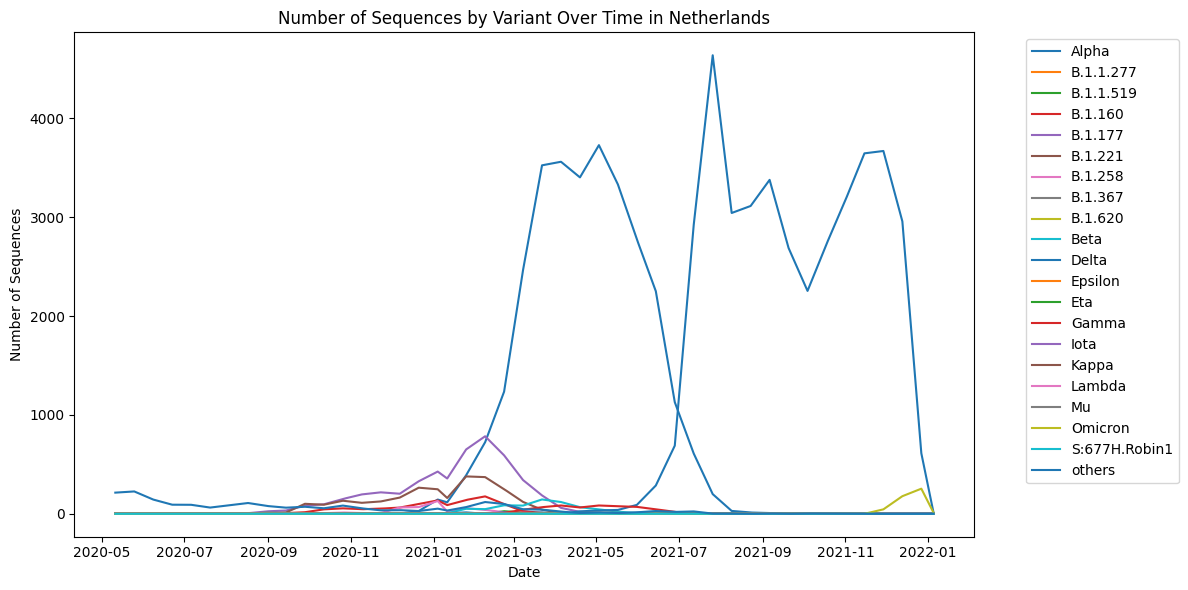

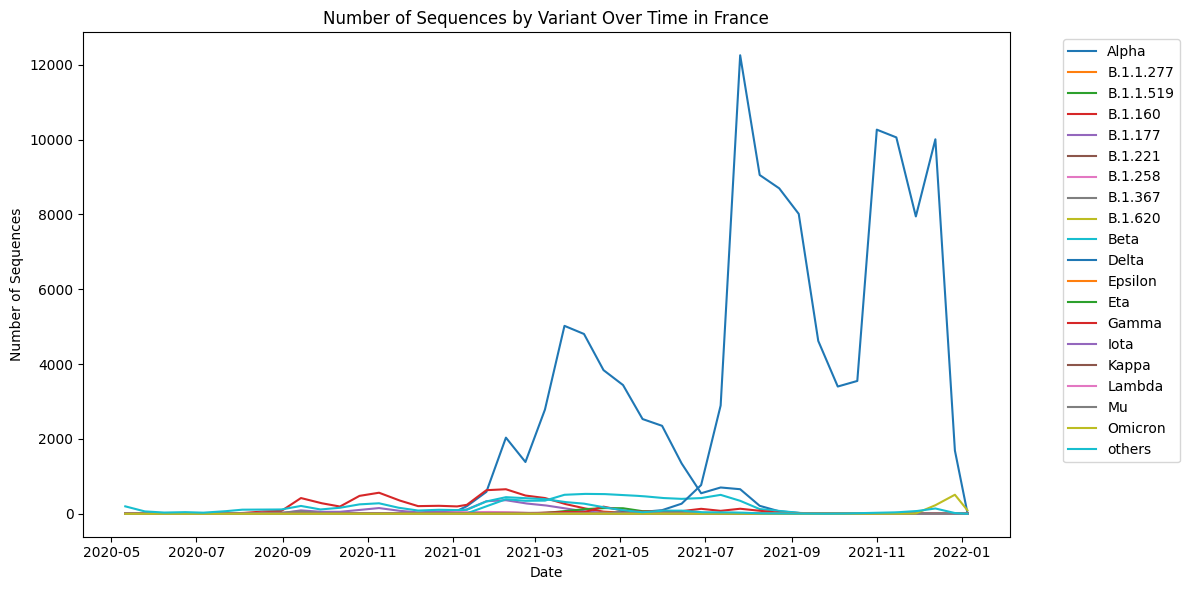

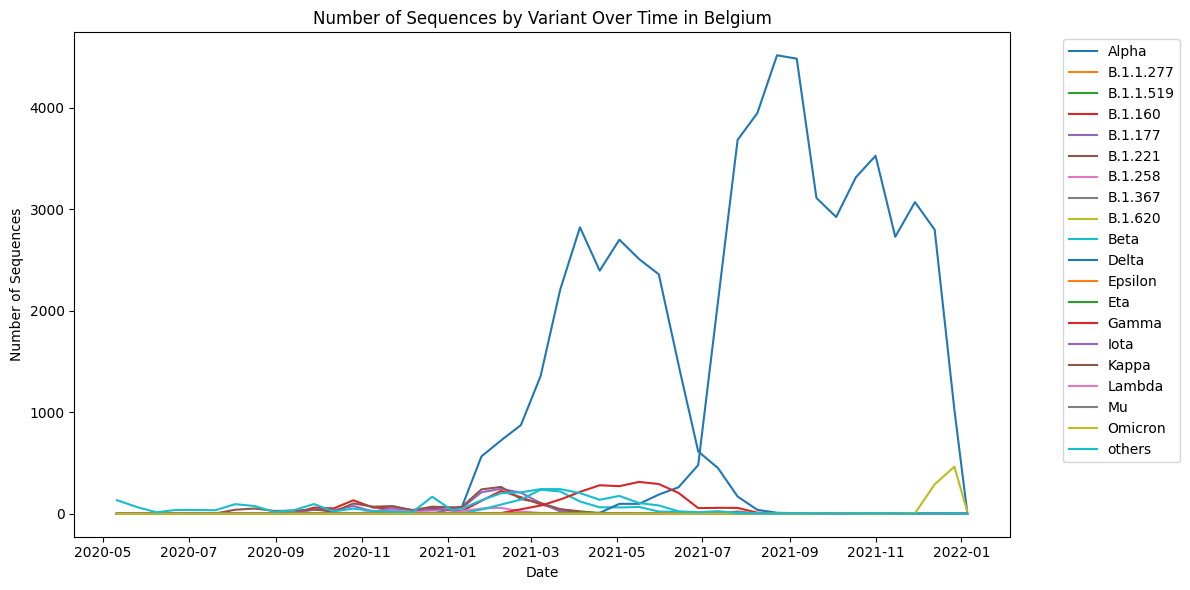

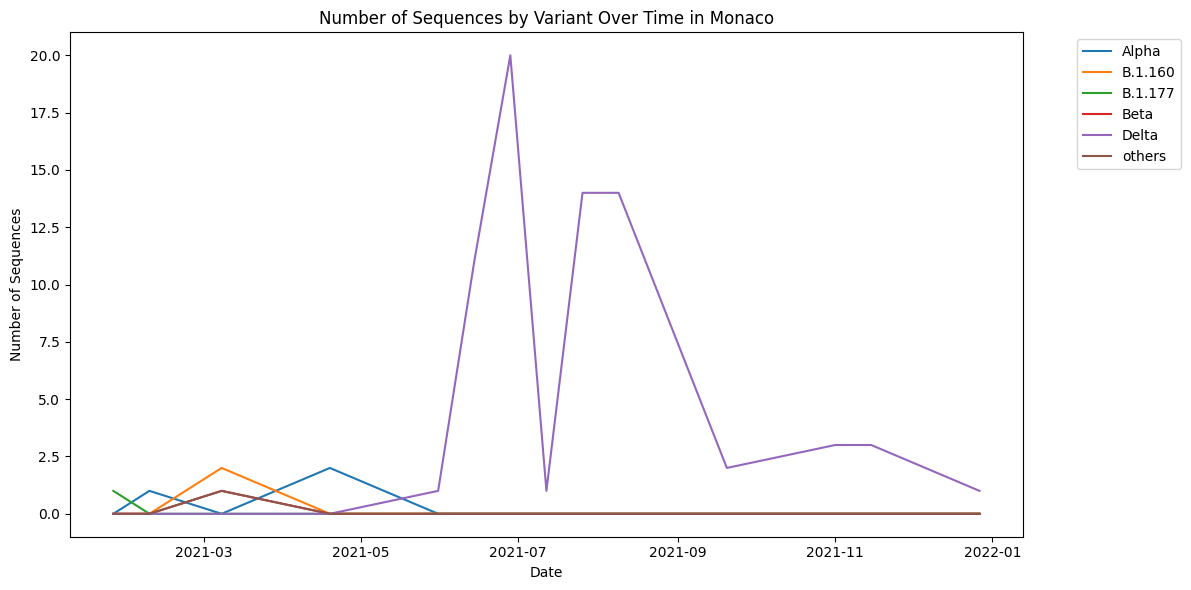

In [17]:
# Looking at the spread of each variant in each country in the Western Europe (from 2_1.ipynb)
countries = dataloader.western_europe_countries
df_plot = covid19_variants_found[covid19_variants_found['country'].isin(countries)]

for country in countries:
    plt.figure(figsize=(12, 6))
    country_data = df_plot[df_plot['country'] == country]
    for variant in country_data['variant'].unique():
        if variant == 'non_who':
            continue
        variant_data = country_data[country_data['variant'] == variant]
        if variant_data['number_of_sequences'].sum() == 0:
            continue
        plt.plot(variant_data['date'], variant_data['number_of_sequences'], label=variant)
    plt.title(f'Number of Sequences by Variant Over Time in {country}')
    plt.xlabel('Date')
    plt.ylabel('Number of Sequences')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

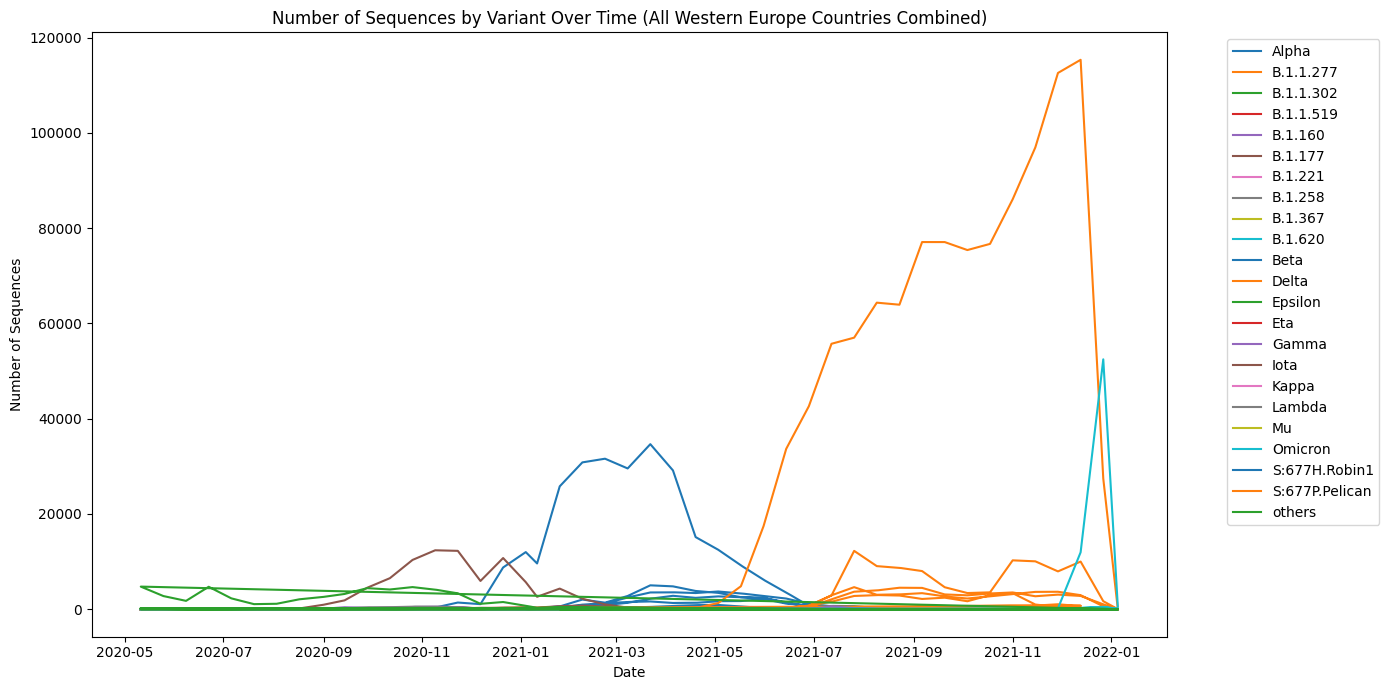

In [18]:
# Number of Sequences by Variant Over Time (All Western Europe Countries Combined) (from 2_1.ipynb)
plt.figure(figsize=(14, 7))
for variant in df_plot['variant'].unique():
    if variant == 'non_who':
        continue
    variant_data = df_plot[df_plot['variant'] == variant]
    if variant_data['number_of_sequences'].sum() == 0:
        continue
    plt.plot(variant_data['date'], variant_data['number_of_sequences'], label=variant)
plt.title('Number of Sequences by Variant Over Time (All Western Europe Countries Combined)')
plt.xlabel('Date')
plt.ylabel('Number of Sequences')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The highest contributing country for each of these variants

In [19]:
# Highest contributing country for each variant (from 2_1.ipynb)
variant_contributions = (
    df_plot[df_plot['variant'] != 'non_who']
    .groupby(['variant', 'country'])['number_of_sequences']
    .sum()
    .reset_index()
)

idx = variant_contributions.groupby('variant')['number_of_sequences'].idxmax()
top_countries = variant_contributions.loc[idx].set_index('variant')

total_sequences_per_variant = (
    df_plot[df_plot['variant'] != 'non_who']
    .groupby('variant')['number_of_sequences']
    .sum()
)

top_countries['contribution_pct'] = (
    top_countries['number_of_sequences'] / total_sequences_per_variant[top_countries.index] * 100
)

top_countries[['country', 'number_of_sequences', 'contribution_pct']]

country  number_of_sequences  contribution_pct
variant                                                              
Alpha           United Kingdom            3603306.0         71.054608
B.1.1.277       United Kingdom               2562.0         94.818653
B.1.1.302       United Kingdom                294.0        100.000000
B.1.1.519               France                612.5         40.415704
B.1.160                 France              83226.5         47.858139
B.1.177         United Kingdom            1121001.0         88.875332
B.1.221            Netherlands              34986.0         42.496386
B.1.258         United Kingdom              52157.0         74.047205
B.1.367         United Kingdom               3972.5         50.692273
B.1.620                 France               1904.0         67.326733
Beta                    France              86401.0         62.388799
Delta           United Kingdom           15131186.0         83.809487
Epsilon         United Kingdom                322.0         50.000000
Eta                     France              10003.0         55.131173
Gamma                  Belgium              28588.0         40.596421
Iota            United Kingdom                294.0         47.727273
Kappa           United Kingdom               6328.0         61.748634
Lambda                  France                938.0         65.686275
Mu              United Kingdom               1579.5         40.756031
Omicron         United Kingdom             775927.0         96.697639
S:677H.Robin1      Netherlands                 14.0        100.000000
S:677P.Pelican  United Kingdom                 14.0        100.000000
others          United Kingdom             713903.5         80.913781

Now we look specifically at each country for the most spreaded variant

In [20]:
# Most spread variant per country (from 2_1.ipynb)
country_variant_totals = (
    df_plot[df_plot['variant'] != 'non_who']
    .groupby(['country', 'variant'])['number_of_sequences']
    .sum()
    .reset_index()
)

idx = country_variant_totals.groupby('country')['number_of_sequences'].idxmax()
top_variant_per_country = country_variant_totals.loc[idx].set_index('country')

top_variant_per_country[['variant', 'number_of_sequences']]

variant  number_of_sequences
country                                    
Belgium          Delta             590328.5
France           Delta            1307519.5
Ireland          Delta             361205.5
Luxembourg       Delta             103674.0
Monaco           Delta               1337.5
Netherlands      Delta             559013.0
United Kingdom   Delta           15131186.0

Looking at top 2 instead of only the most spreaded variant

In [21]:
# Top 2 variants per country (from 2_1.ipynb)
top2_variants_per_country = (
    country_variant_totals[country_variant_totals['variant'] != 'non_who']
    .sort_values(['country', 'number_of_sequences'], ascending=[True, False])
    .groupby('country')
    .head(2)
    .set_index('country')
)

top2_variants_per_country[['variant', 'number_of_sequences']]

variant  number_of_sequences
country                                    
Belgium          Delta             590328.5
Belgium          Alpha             299019.0
France           Delta            1307519.5
France           Alpha             456120.0
Ireland          Delta             361205.5
Ireland          Alpha             229548.0
Luxembourg       Delta             103674.0
Luxembourg       Alpha              68610.5
Monaco           Delta               1337.5
Monaco           Alpha                105.0
Netherlands      Delta             559013.0
Netherlands      Alpha             414470.0
United Kingdom   Delta           15131186.0
United Kingdom   Alpha            3603306.0

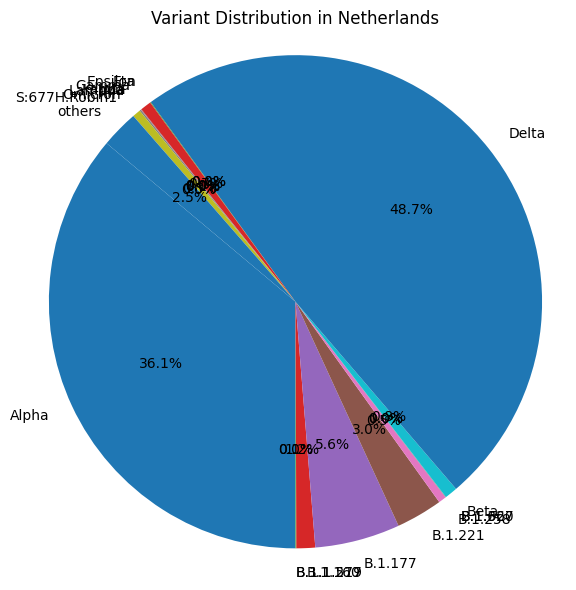

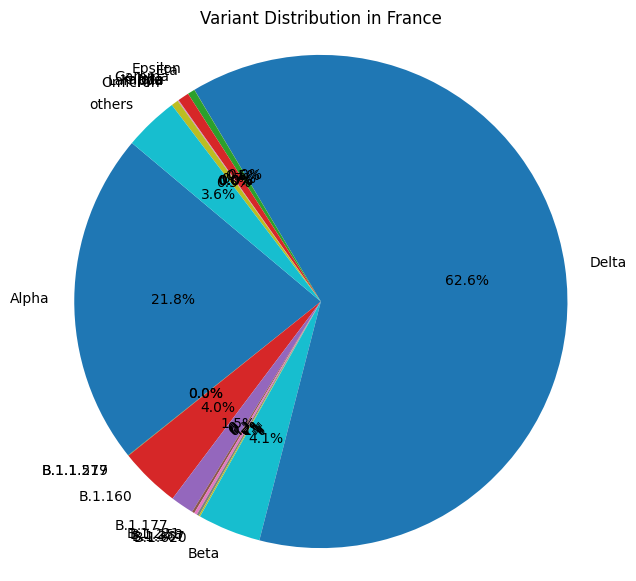

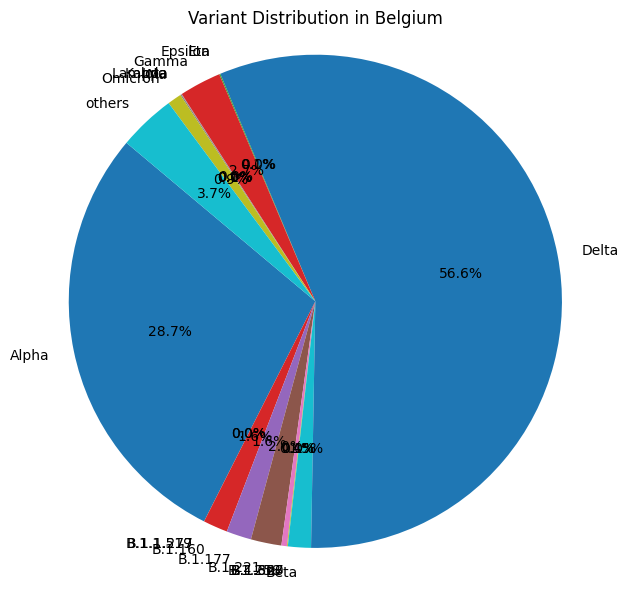

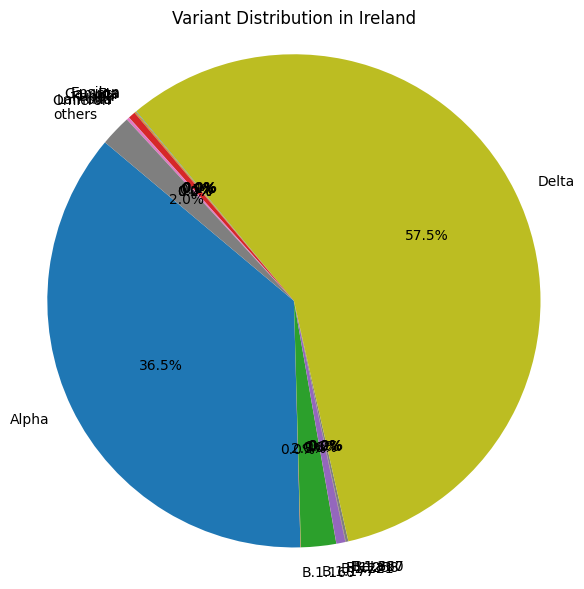

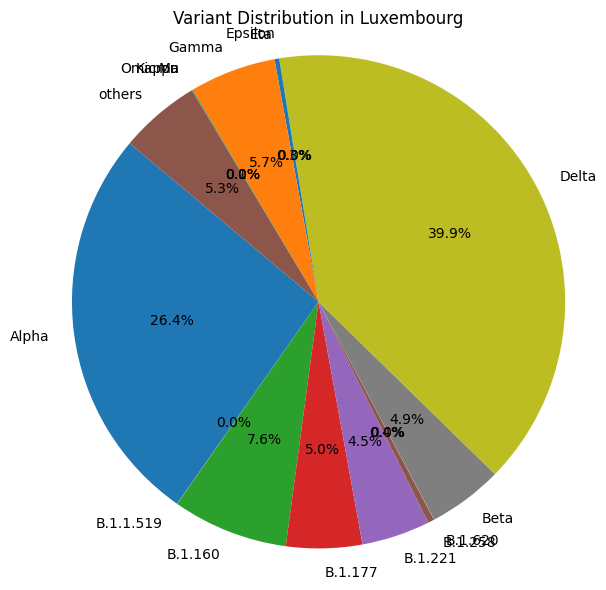

In [22]:
# Variant Distribution in Western European Countries (Pie Charts) (from 2_2.ipynb)
countries = dataloader.western_europe_countries

for country in countries:
    df_country = covid19_variants_found[covid19_variants_found['country'] == country]
    variant_counts = df_country.groupby('variant')['number_of_sequences'].sum()
    variant_counts = variant_counts[(variant_counts > 0) & (variant_counts.index != 'non_who')]
    plt.figure(figsize=(7, 7))
    plt.pie(variant_counts, labels=variant_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Variant Distribution in {country}')
    plt.axis('equal')
    plt.show()

In [23]:
# COVID-19 Deaths in Western European Countries (Bar Plot) (from 2_2.ipynb)
fig, ax = plt.subplots(figsize=(10, 6))
subset = comprehensive_data[comprehensive_data['country'].isin(countries)]
subset = subset.set_index('country')

subset['deaths_cases'].plot(kind='bar', ax=ax)
ax.set_ylabel('Number of Cases')
ax.set_title('COVID-19 Deaths in Western European Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Calculate death to recovery ratio (from 2_2.ipynb)
death_recovery = comprehensive_data[['country', 'deaths_cases', 'recovered_cases']].copy()
death_recovery['death_to_recovery_ratio'] = death_recovery['deaths_cases'] / death_recovery['recovered_cases']
death_recovery['death_to_recovery_ratio_per_thousand'] = death_recovery['death_to_recovery_ratio'] * 1000
death_recovery[death_recovery['country'].isin(countries)]

country  deaths_cases  recovered_cases  death_to_recovery_ratio  \
19  United Kingdom      232112.0       24692874.0                 0.009400   
26         Belgium       34339.0        4827378.0                 0.007113   
38          France      168091.0       38829399.0                 0.004329   
62         Ireland        9604.0        1726464.0                 0.005563   
64          Monaco          67.0          17114.0                 0.003915   
83      Luxembourg        1000.0         390378.0                 0.002562   
92     Netherlands       22986.0        8613215.0                 0.002669   

    death_to_recovery_ratio_per_thousand  
19                              9.399959  
26                              7.113385  
38                              4.328962  
62                              5.562815  
64                              3.914923  
83                              2.561620  
92                              2.668690

In [25]:
# Correlation Heatmap: COVID-19 Variants vs Death/Recovery Metrics (from 2_2.ipynb)
variant_summary = covid19_variants_found.groupby('country').agg({
    'number_of_sequences': 'sum',
    'total_sequences': 'mean'
}).reset_index()

merged_df = pd.merge(variant_summary, death_recovery, on='country', how='inner')

correlation_columns = ['number_of_sequences', 'total_sequences', 'deaths_cases', 
                      'recovered_cases', 'death_to_recovery_ratio']
correlation_data = merged_df[correlation_columns]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Heatmap: COVID-19 Variants vs Death/Recovery Metrics')
plt.tight_layout()
plt.show()

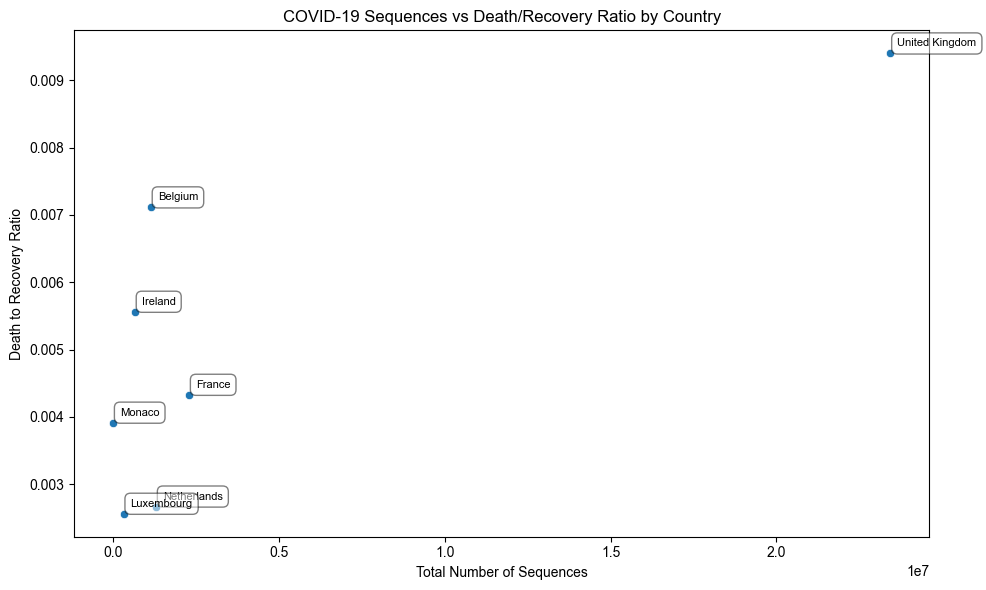

In [26]:
# COVID-19 Sequences vs Death/Recovery Ratio by Country (Scatter Plot) (from 2_2.ipynb)
total_sequences_by_country = {}
for country in countries:
    df_country = covid19_variants_found[covid19_variants_found['country'] == country]
    total_sequences = df_country['number_of_sequences'].sum()
    total_sequences_by_country[country] = total_sequences

x_values = []
y_values = []
labels = []

for country in countries:
    if country in total_sequences_by_country and country in death_recovery['country'].values:
        x_values.append(total_sequences_by_country[country])
        country_data = death_recovery[death_recovery['country'] == country]
        if not country_data.empty:
            y_values.append(country_data['death_to_recovery_ratio'].iloc[0])
            labels.append(country)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_values, y=y_values)

for i, label in enumerate(labels):
    plt.annotate(label,
                 (x_values[i], y_values[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
                 fontsize=8)

plt.xlabel('Total Number of Sequences')
plt.ylabel('Death to Recovery Ratio')
plt.title('COVID-19 Sequences vs Death/Recovery Ratio by Country')

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()

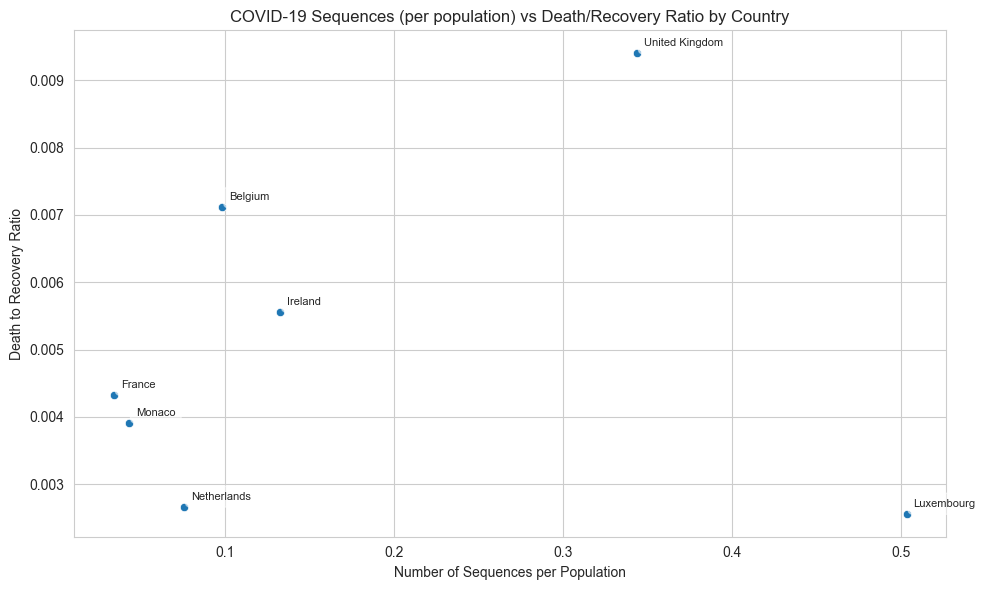

In [27]:
# COVID-19 Sequences (per population) vs Death/Recovery Ratio by Country (Scatter Plot) (from 2_2.ipynb)
sequences_per_population = {}
for country in countries:
    df_country = covid19_variants_found[covid19_variants_found['country'] == country]
    total_sequences = df_country['number_of_sequences'].sum()

    country_vax = vaccinations_by_country[vaccinations_by_country['country'] == country]
    if not country_vax.empty:
        people_vaccinated = country_vax['people_vaccinated'].max()
        people_vaccinated_per_hundred = country_vax['people_vaccinated_per_hundred'].max()
        if people_vaccinated_per_hundred > 0:
            population = people_vaccinated / \
                (people_vaccinated_per_hundred / 100)
            sequences_per_population[country] = total_sequences / population

x_values = []
y_values = []
labels = []

for country in countries:
    if country in sequences_per_population and country in death_recovery['country'].values:
        x_values.append(sequences_per_population[country])
        country_data = death_recovery[death_recovery['country'] == country]
        if not country_data.empty:
            y_values.append(country_data['death_to_recovery_ratio'].iloc[0])
            labels.append(country)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_values, y=y_values)

for i, label in enumerate(labels):
    plt.annotate(label,
                 (x_values[i], y_values[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
                 fontsize=8)

plt.xlabel('Number of Sequences per Population')
plt.ylabel('Death to Recovery Ratio')
plt.title('COVID-19 Sequences (per population) vs Death/Recovery Ratio by Country')

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()

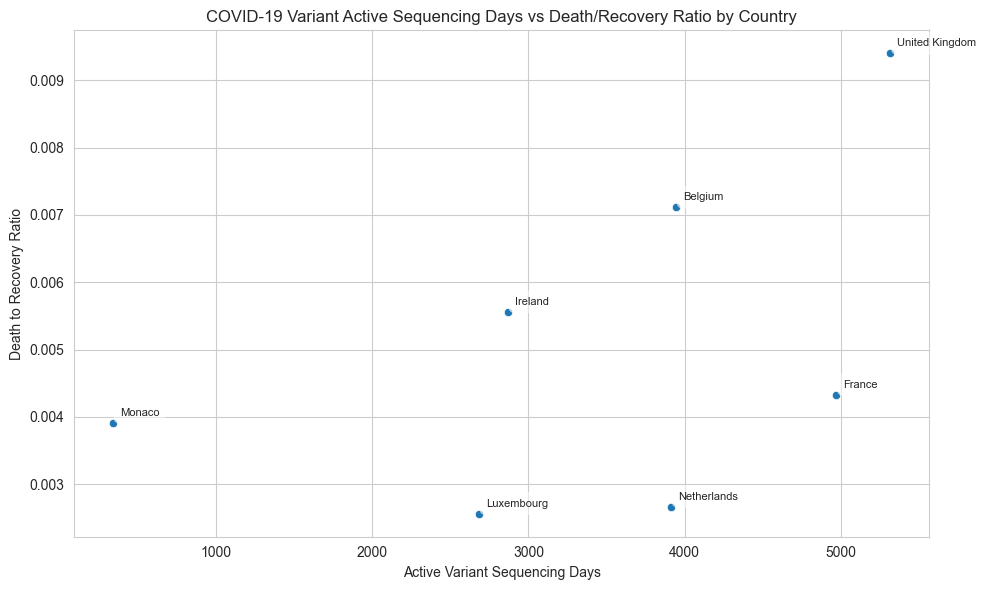

In [28]:
# COVID-19 Variant Active Sequencing Days vs Death/Recovery Ratio by Country (Scatter Plot) (from 2_2.ipynb)
days_with_sequences = {}
for country in countries:
    df_country = covid19_variants_found[covid19_variants_found['country'] == country]
    daily_sequences = df_country.groupby(['date', 'variant'])['number_of_sequences'].sum()
    days_with_seq = (daily_sequences >= 1).sum()
    days_with_sequences[country] = days_with_seq

x_values = []
y_values = []
labels = []

for country in countries:
    if country in days_with_sequences and country in death_recovery['country'].values:
        x_values.append(days_with_sequences[country])
        country_data = death_recovery[death_recovery['country'] == country]
        if not country_data.empty:
            y_values.append(country_data['death_to_recovery_ratio'].iloc[0])
            labels.append(country)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_values, y=y_values)

for i, label in enumerate(labels):
    plt.annotate(label,
                 (x_values[i], y_values[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
                 fontsize=8)

plt.xlabel('Active Variant Sequencing Days')
plt.ylabel('Death to Recovery Ratio')
plt.title('COVID-19 Variant Active Sequencing Days vs Death/Recovery Ratio by Country')

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()

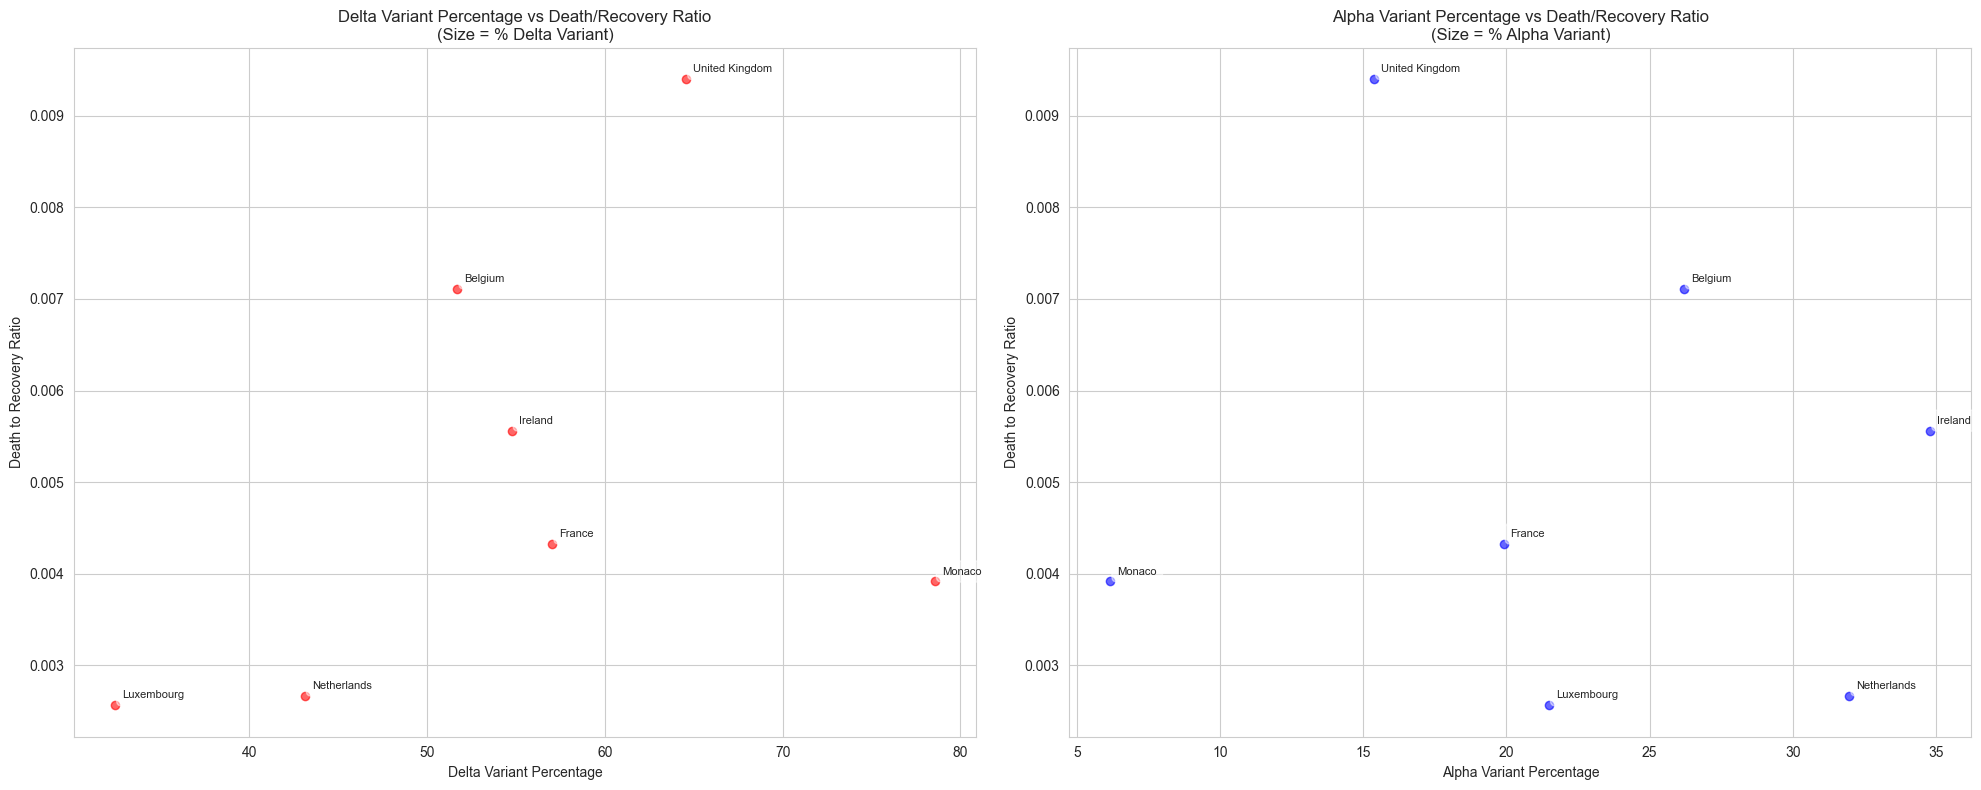

In [29]:
# Calculate percentage of Delta and Alpha variants for each country
delta_percentages = {}
alpha_percentages = {}
for country in countries:
    df_country = covid19_variants_found[covid19_variants_found['country'] == country]

    # Calculate total sequences for the country
    total_sequences = df_country['number_of_sequences'].sum()

    # Calculate Delta percentage
    delta_sequences = df_country[df_country['variant']
                                 == 'Delta']['number_of_sequences'].sum()
    delta_percentages[country] = (
        delta_sequences / total_sequences * 100) if total_sequences > 0 else 0

    # Calculate Alpha percentage
    alpha_sequences = df_country[df_country['variant']
                                 == 'Alpha']['number_of_sequences'].sum()
    alpha_percentages[country] = (
        alpha_sequences / total_sequences * 100) if total_sequences > 0 else 0

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Create lists for plotting
x_values_delta = []
x_values_alpha = []
y_values = []
labels = []

for country in countries:
    df_country = covid19_variants_found[covid19_variants_found['country'] == country]

    # Calculate total sequences for the country
    total_sequences = df_country['number_of_sequences'].sum()

    # Calculate Delta and Alpha percentages
    delta_sequences = df_country[df_country['variant']
                                 == 'Delta']['number_of_sequences'].sum()
    alpha_sequences = df_country[df_country['variant']
                                 == 'Alpha']['number_of_sequences'].sum()

    delta_percentage = (delta_sequences / total_sequences *
                        100) if total_sequences > 0 else 0
    alpha_percentage = (alpha_sequences / total_sequences *
                        100) if total_sequences > 0 else 0

    if country in death_recovery['country'].values:
        x_values_delta.append(delta_percentage)
        x_values_alpha.append(alpha_percentage)
        country_data = death_recovery[death_recovery['country'] == country]
        if not country_data.empty:
            y_values.append(country_data['death_to_recovery_ratio'].iloc[0])
            labels.append(country)

# Delta variant plot (in red)
scatter1 = ax1.scatter(x_values_delta, y_values, alpha=0.6, color='red')
ax1.set_xlabel('Delta Variant Percentage')
ax1.set_ylabel('Death to Recovery Ratio')
ax1.set_title(
    'Delta Variant Percentage vs Death/Recovery Ratio\n(Size = % Delta Variant)')

# Alpha variant plot (in blue)
scatter2 = ax2.scatter(x_values_alpha, y_values, alpha=0.6, color='blue')
ax2.set_xlabel('Alpha Variant Percentage')
ax2.set_ylabel('Death to Recovery Ratio')
ax2.set_title(
    'Alpha Variant Percentage vs Death/Recovery Ratio\n(Size = % Alpha Variant)')

# Add labels for each point in both plots
for i, label in enumerate(labels):
    ax1.annotate(label,
                 (x_values_delta[i], y_values[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
                 fontsize=8)
    ax2.annotate(label,
                 (x_values_alpha[i], y_values[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
                 fontsize=8)

# Add grid and style
sns.set_style("whitegrid")
plt.tight_layout()
plt.show()

# Q3: Vaccine Manufacturer Analysis and Performance

## Vacciation Manufacturer Distribution

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_28232\3145670700.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(all_manufacturers, rotation=90)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_28232\3145670700.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(all_manufacturers, rotation=90)


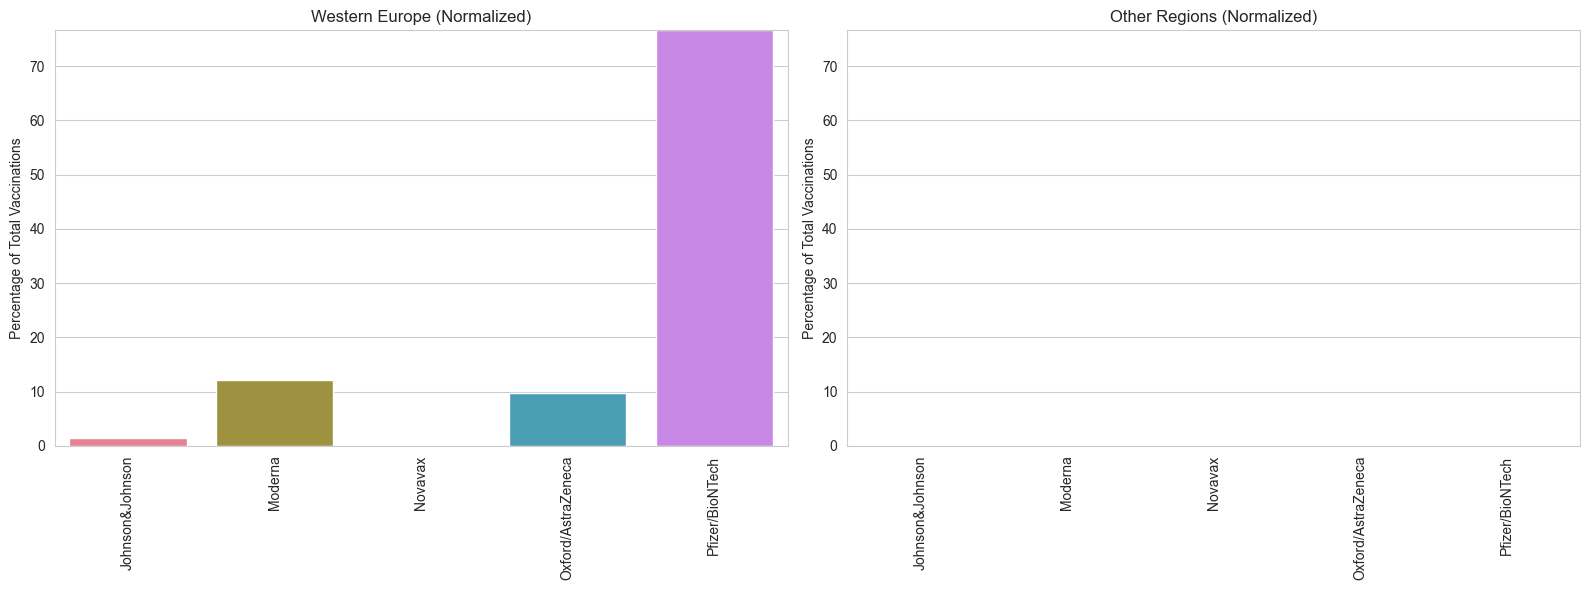

In [30]:
# Calculate total vaccinations for each region and plot (from q3_final.ipynb)
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

other_data = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

all_data = vaccination_by_manufacturer.groupby(
    'manufacturer')['total_vaccinations'].sum()

all_manufacturers = all_data.index.tolist()

western_data = (western_data / western_data.sum()) * 100
other_data = (other_data / other_data.sum()) * 100
all_data = (all_data / all_data.sum()) * 100

western_data = western_data.reindex(all_manufacturers, fill_value=0)
other_data = other_data.reindex(all_manufacturers, fill_value=0)
all_data = all_data.reindex(all_manufacturers, fill_value=0)

color_palette = sns.color_palette("husl", n_colors=len(all_manufacturers))
manufacturer_colors = dict(zip(all_manufacturers, color_palette))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

max_y = max(western_data.max(), other_data.max(), all_data.max())

sns.barplot(x=all_manufacturers, y=western_data.values, ax=ax1,
            hue=all_manufacturers, legend=False,
            palette=[manufacturer_colors[m] for m in all_manufacturers])
ax1.set_title('Western Europe (Normalized)')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Percentage of Total Vaccinations')
ax1.set_ylim(0, max_y)
ax1.set_xticklabels(all_manufacturers, rotation=90)

sns.barplot(x=all_manufacturers, y=other_data.values, ax=ax2,
            hue=all_manufacturers, legend=False,
            palette=[manufacturer_colors[m] for m in all_manufacturers])
ax2.set_title('Other Regions (Normalized)')
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Percentage of Total Vaccinations')
ax2.set_ylim(0, max_y)
ax2.set_xticklabels(all_manufacturers, rotation=90)

plt.tight_layout()
plt.show()

<Figure size 1600x900 with 0 Axes>

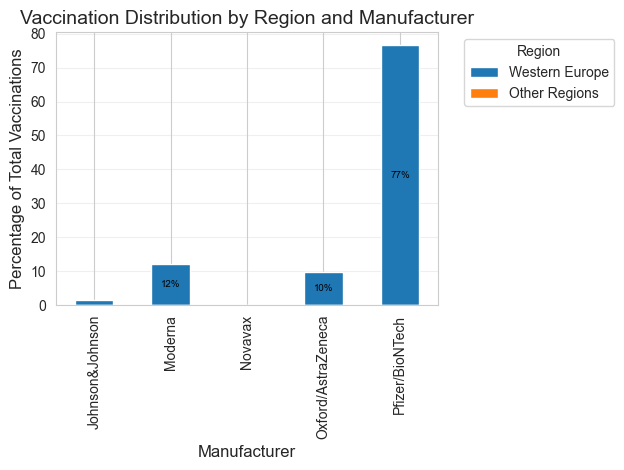

In [31]:
# Stacked bar plot of vaccination distribution by region and manufacturer (from q3_final.ipynb)
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

other_data = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

all_data = vaccination_by_manufacturer.groupby(
    'manufacturer')['total_vaccinations'].sum()

all_manufacturers = all_data.index.tolist()

western_data = (western_data / all_data.sum()) * 100
other_data = (other_data / all_data.sum()) * 100

western_data = western_data.reindex(all_manufacturers, fill_value=0)
other_data = other_data.reindex(all_manufacturers, fill_value=0)

plot_data = pd.DataFrame({
    'Western Europe': western_data,
    'Other Regions': other_data
})

plt.figure(figsize=(16, 9))

ax = plot_data.plot(kind='bar', stacked=True)

plt.title('Vaccination Distribution by Region and Manufacturer', fontsize=14)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Percentage of Total Vaccinations', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

for c in ax.containers:
    labels = [f'{v:.0f}%' if v >= 5 else '' for v in [rect.get_height()
                                                      for rect in c]]
    ax.bar_label(c, labels=labels, label_type='center',
                 fontsize=7, color='black')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

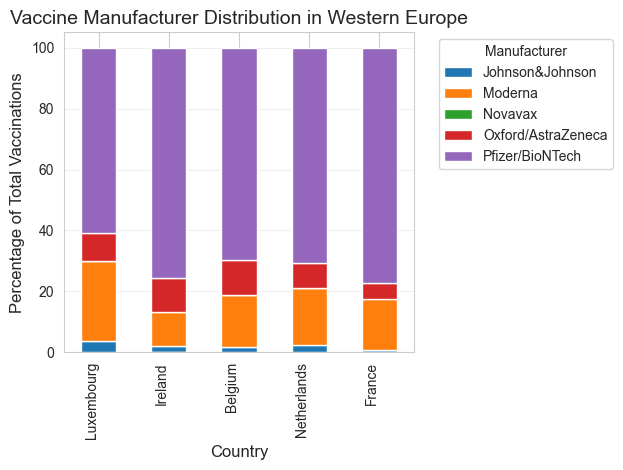

In [32]:
# Stacked bar plot of vaccine manufacturer distribution in Western Europe by country (from q3_final.ipynb)
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']]

latest_data = western_data.sort_values(
    'date').groupby(['country', 'manufacturer']).last()
latest_data = latest_data.reset_index()

total_by_country = latest_data.groupby('country')['total_vaccinations'].sum()
latest_data['percentage'] = latest_data.apply(lambda x: (
    x['total_vaccinations'] / total_by_country[x['country']]) * 100, axis=1)

pivot_data = latest_data.pivot(
    index='country', columns='manufacturer', values='percentage').fillna(0)

country_order = latest_data.groupby(
    'country')['total_vaccinations'].sum().sort_values(ascending=True).index

plt.figure(figsize=(15, 10))
pivot_data.reindex(country_order).plot(kind='bar', stacked=True)

plt.title('Vaccine Manufacturer Distribution in Western Europe', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Total Vaccinations', fontsize=12)
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')

plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

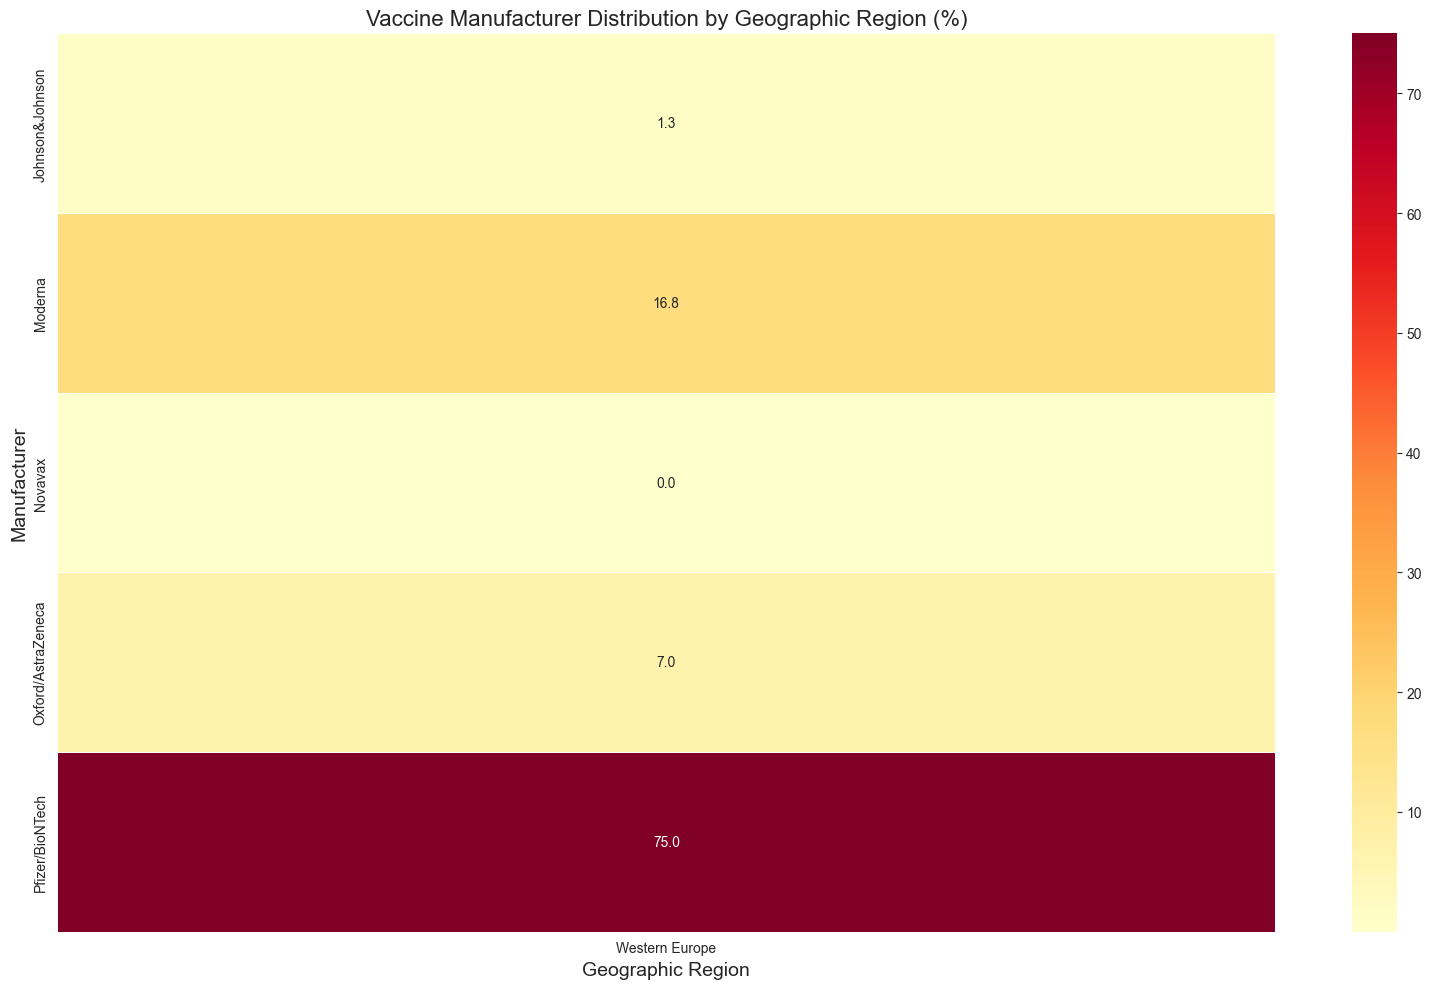

In [33]:
# Heatmap of vaccine manufacturer distribution by geographic region (from q3_final.ipynb)
region_mapping = {
    'Belgium': 'Western Europe', 'France': 'Western Europe', 'Ireland': 'Western Europe',
    'Luxembourg': 'Western Europe', 'Monaco': 'Western Europe', 'Netherlands': 'Western Europe',
    'United Kingdom': 'Western Europe',

    'Austria': 'Europe', 'Denmark': 'Europe', 'Finland': 'Europe',
    'Germany': 'Europe', 'Greece': 'Europe', 'Iceland': 'Europe',
    'Italy': 'Europe', 'Norway': 'Europe', 'Portugal': 'Europe', 
    'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe',

    'Canada': 'North America', 'Costa Rica': 'North America', 'Mexico': 'North America',
    'Panama': 'North America', 'United States': 'North America',

    'Argentina': 'South America', 'Bolivia': 'South America', 'Brazil': 'South America',
    'Chile': 'South America', 'Colombia': 'South America', 'Ecuador': 'South America',
    'Paraguay': 'South America', 'Peru': 'South America', 'Uruguay': 'South America',
    'Venezuela': 'South America',

    'China': 'Asia', 'India': 'Asia', 'Indonesia': 'Asia', 'Japan': 'Asia',
    'Malaysia': 'Asia', 'Philippines': 'Asia', 'Singapore': 'Asia', 'South Korea': 'Asia',
    'Taiwan': 'Asia', 'Thailand': 'Asia', 'Vietnam': 'Asia',
    'Bangladesh': 'Asia', 'Pakistan': 'Asia', 'Sri Lanka': 'Asia',

    'Iran': 'Middle East', 'Iraq': 'Middle East', 'Israel': 'Middle East',
    'Saudi Arabia': 'Middle East', 'Turkey': 'Middle East', 'United Arab Emirates': 'Middle East',

    'Algeria': 'Africa', 'Egypt': 'Africa', 'Ethiopia': 'Africa', 'Kenya': 'Africa',
    'Morocco': 'Africa', 'Nigeria': 'Africa', 'South Africa': 'Africa', 'Tunisia': 'Africa',

    'Australia': 'Oceania', 'New Zealand': 'Oceania',

    'Bulgaria': 'Eastern Europe', 'Croatia': 'Eastern Europe', 'Czech Republic': 'Eastern Europe',
    'Estonia': 'Eastern Europe', 'Hungary': 'Eastern Europe', 'Latvia': 'Eastern Europe',
    'Lithuania': 'Eastern Europe', 'Poland': 'Eastern Europe', 'Romania': 'Eastern Europe',
    'Russia': 'Eastern Europe', 'Serbia': 'Eastern Europe', 'Slovakia': 'Eastern Europe',
    'Slovenia': 'Eastern Europe', 'Ukraine': 'Eastern Europe'
}

latest_vax_data = vaccination_by_manufacturer.sort_values('date').groupby(['country', 'manufacturer']).last().reset_index()

latest_vax_data['region'] = latest_vax_data['country'].map(region_mapping)

latest_vax_data_with_region = latest_vax_data.dropna(subset=['region'])

region_distribution = latest_vax_data_with_region.groupby(
    ['region', 'manufacturer'])['total_vaccinations'].sum().reset_index()

region_totals = region_distribution.groupby(
    'region')['total_vaccinations'].sum()
region_distribution['percentage'] = region_distribution.apply(
    lambda x: (x['total_vaccinations'] / region_totals[x['region']]) * 100, axis=1
)

region_pivot = region_distribution.pivot(
    index='manufacturer', columns='region', values='percentage').fillna(0)

plt.figure(figsize=(16, 10))
sns.heatmap(region_pivot, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=.5)

plt.title('Vaccine Manufacturer Distribution by Geographic Region (%)', fontsize=16)
plt.xlabel('Geographic Region', fontsize=14)
plt.ylabel('Manufacturer', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_28232\1166175386.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


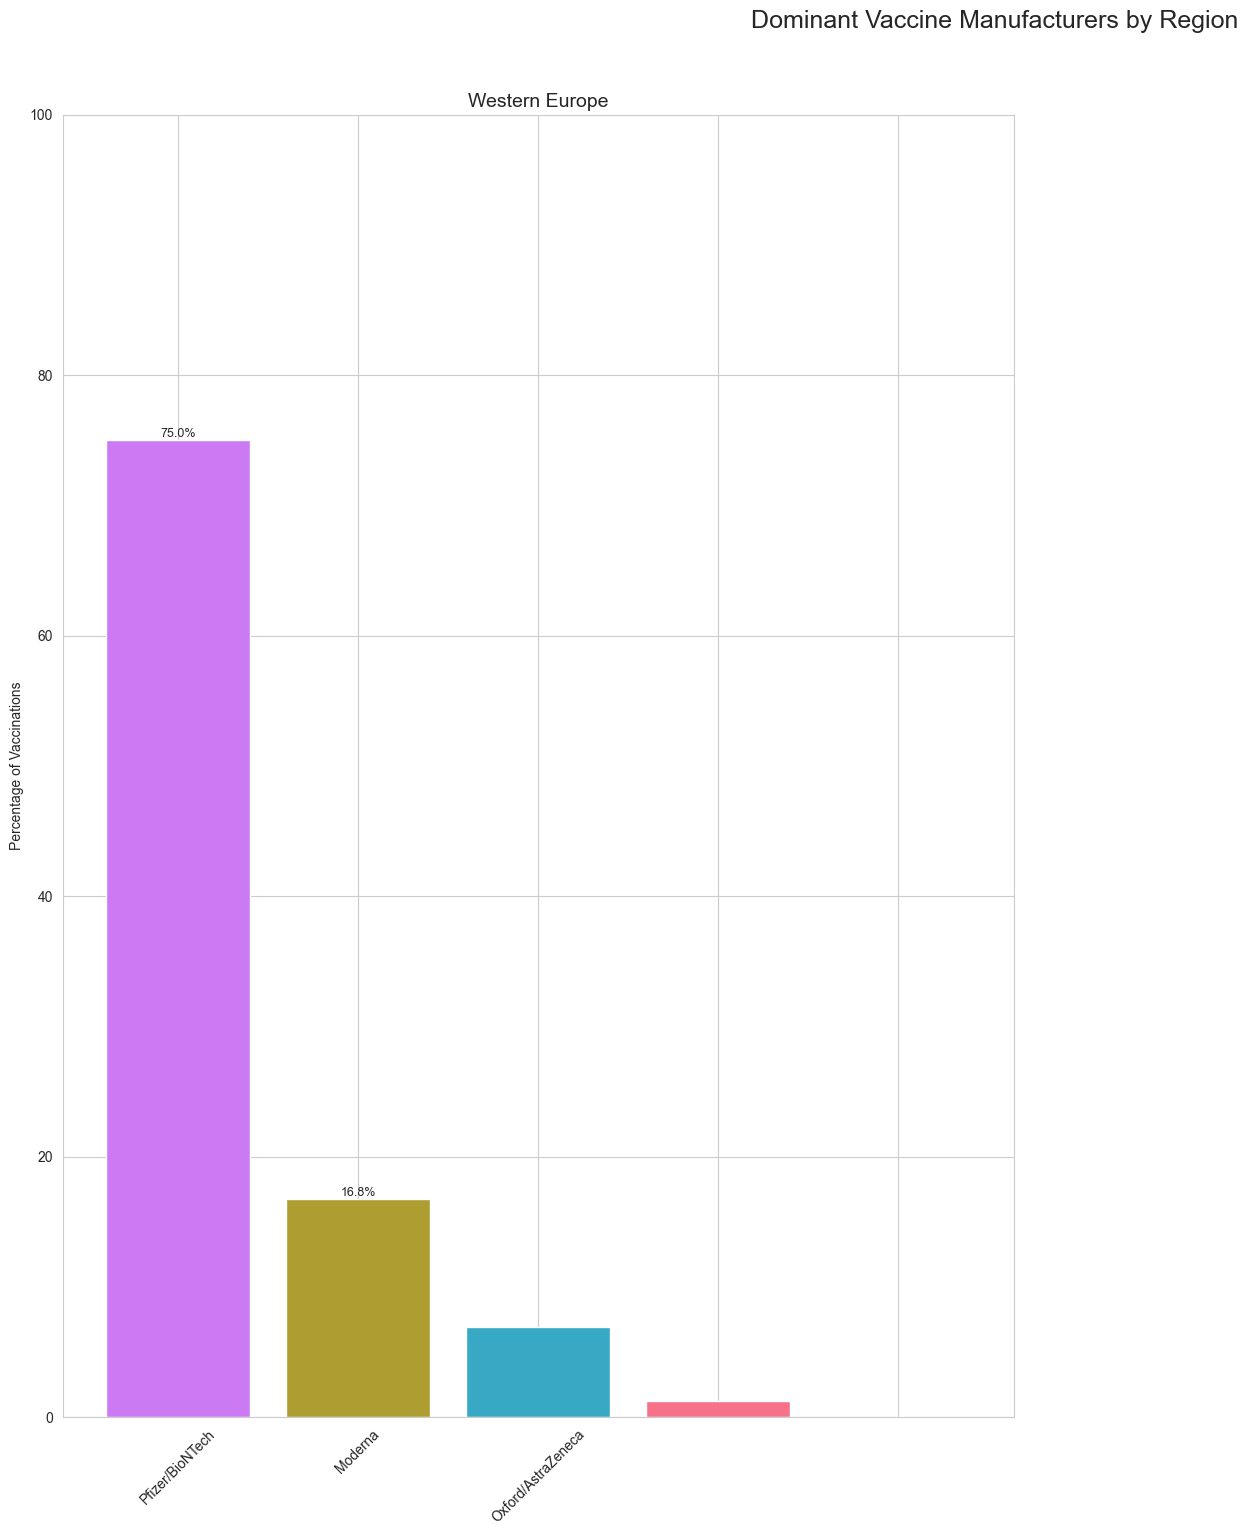

In [34]:
# Dominant Vaccine Manufacturers by Region (from q3_final.ipynb)
plt.figure(figsize=(20, 15))

regions = region_distribution['region'].unique()
n_regions = len(regions)
ncols = 2
nrows = (n_regions + 1) // ncols

for i, region in enumerate(regions):
    ax = plt.subplot(nrows, ncols, i + 1)

    region_data = region_distribution[region_distribution['region'] == region]

    region_data = region_data.sort_values('percentage', ascending=False)

    bars = ax.bar(region_data['manufacturer'], region_data['percentage'],
                  color=[manufacturer_colors.get(m, 'gray') for m in region_data['manufacturer']])

    for bar in bars:
        height = bar.get_height()
        if height >= 10:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%',
                    ha='center', va='bottom', fontsize=9)

    ax.set_title(f'{region}', fontsize=14)
    ax.set_ylabel('Percentage of Vaccinations')
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=45)

    threshold = 5
    labels = [m if p >= threshold else '' for m, p in zip(
        region_data['manufacturer'], region_data['percentage'])]
    ax.set_xticklabels(labels)

plt.tight_layout()
plt.suptitle('Dominant Vaccine Manufacturers by Region', fontsize=18, y=1.02)
plt.subplots_adjust(top=0.95)
plt.show()

## Vaccination Manufacturer Performance

In [35]:
# Dominant Manufacturers by Country (from q3_final.ipynb)
latest_data = vaccination_by_manufacturer.sort_values('date').groupby(['country', 'manufacturer']).last()
latest_data = latest_data.reset_index()

country_totals = latest_data.groupby('country')['total_vaccinations'].sum()
latest_data['percentage'] = latest_data.apply(
    lambda x: (x['total_vaccinations'] / country_totals[x['country']]) * 100, axis=1)

dominant_manufacturers = latest_data.loc[latest_data.groupby('country')['percentage'].idxmax()]
dominant_manufacturers = dominant_manufacturers.sort_values('percentage', ascending=False)

print("Dominant Manufacturers by Country:")
print("=================================")
for _, row in dominant_manufacturers.iterrows():
    print(f"{row['country']}: {row['manufacturer']} ({row['percentage']:.1f}%)")

Dominant Manufacturers by Country:
France: Pfizer/BioNTech (77.1%)
Ireland: Pfizer/BioNTech (75.5%)
Netherlands: Pfizer/BioNTech (70.5%)
Belgium: Pfizer/BioNTech (69.8%)
Luxembourg: Pfizer/BioNTech (60.9%)


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_28232\17817237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dominant_manufacturers, x='manufacturer', y='percentage',


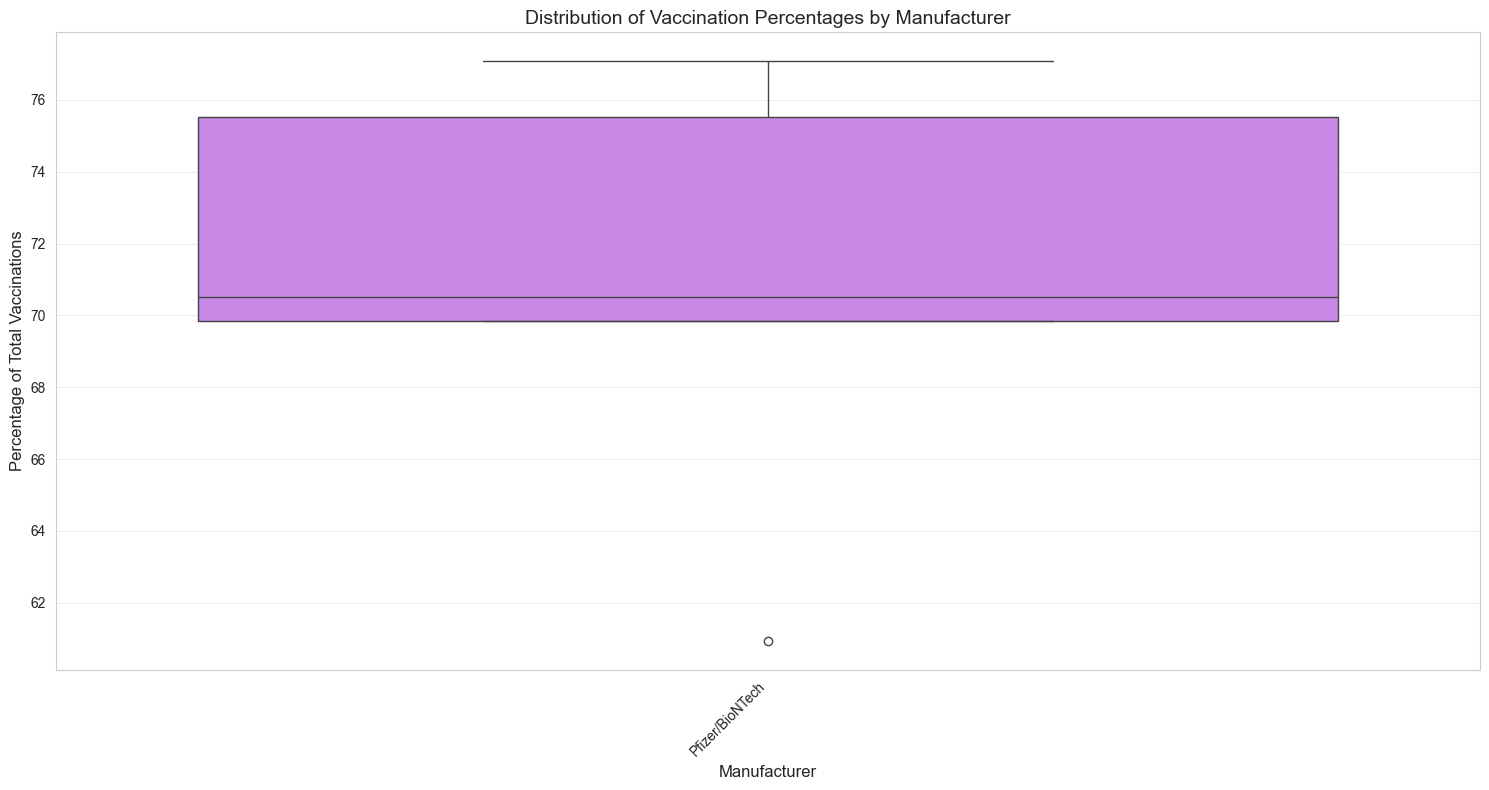

In [36]:
# Distribution of Vaccination Percentages by Manufacturer (Box Plot) (from q3_final.ipynb)
plt.figure(figsize=(15, 8))

sns.boxplot(data=dominant_manufacturers, x='manufacturer', y='percentage',
            palette=manufacturer_colors)

plt.title('Distribution of Vaccination Percentages by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Percentage of Total Vaccinations', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

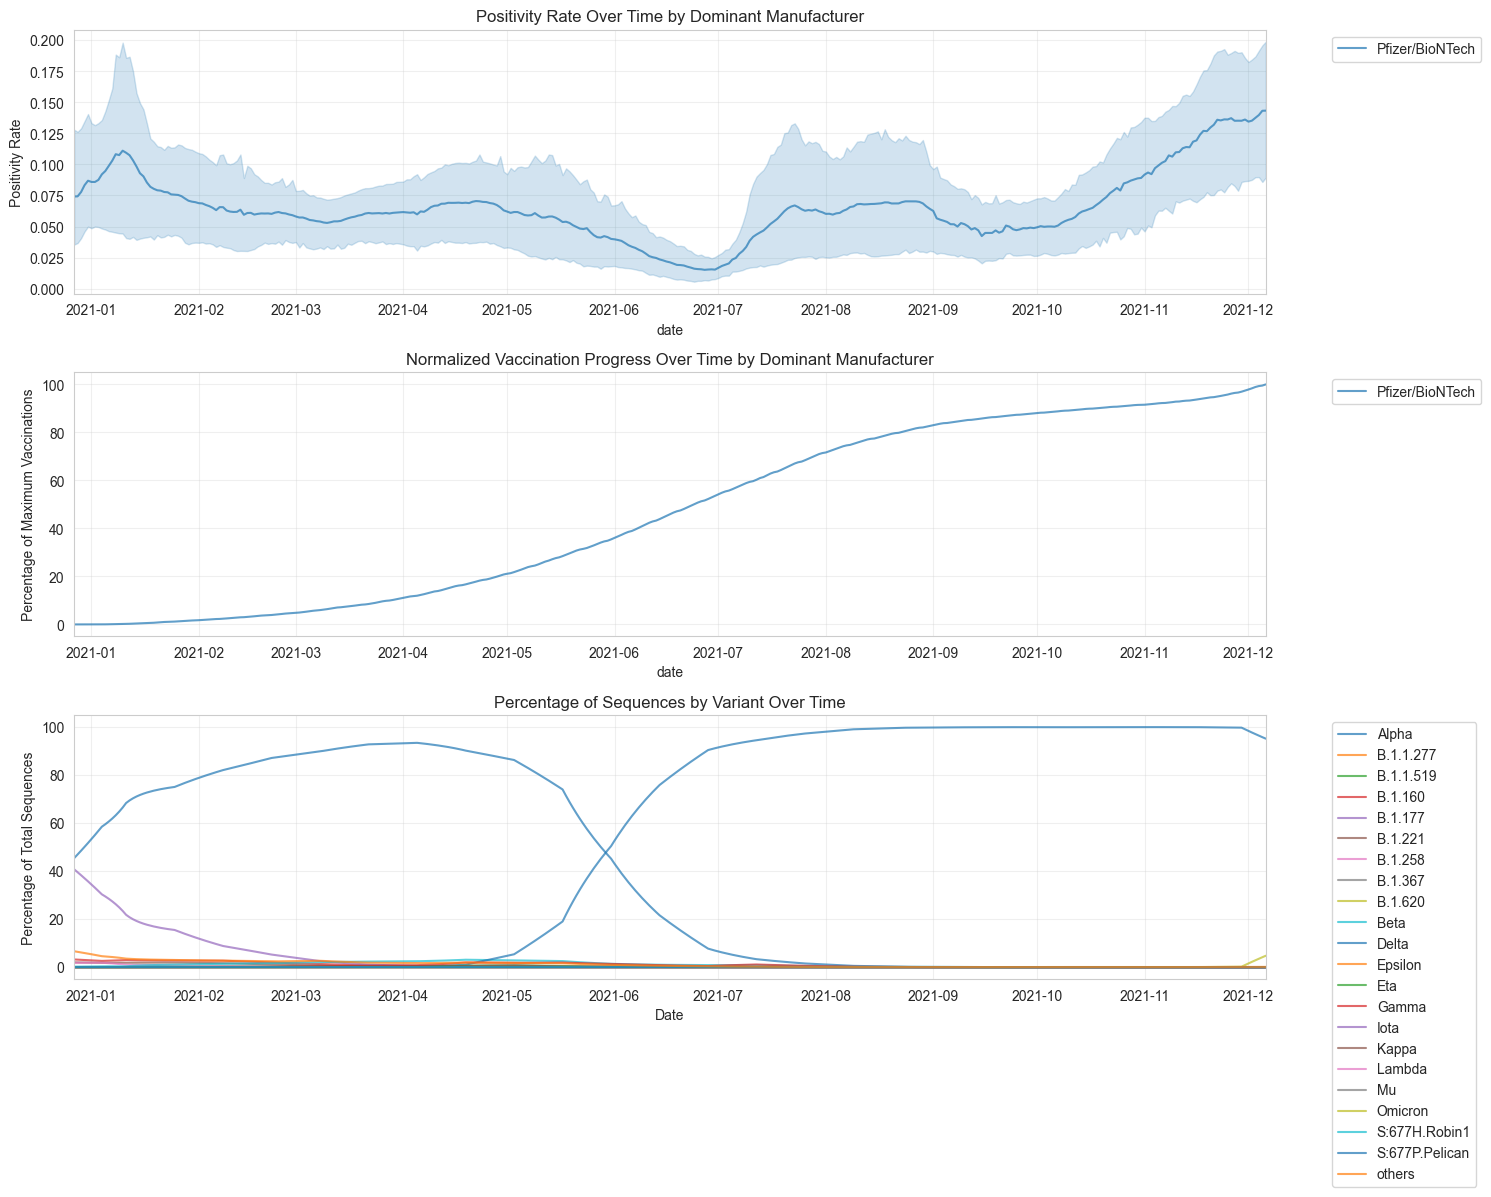

In [37]:
# Positivity Rate, Normalized Vaccination Progress, and Percentage of Sequences by Variant Over Time by Dominant Manufacturer (from q3_final.ipynb)
countries_by_manufacturer = dominant_manufacturers[dominant_manufacturers['percentage'] >= 60].set_index('country')['manufacturer']

all_manufacturers = all_data.index.tolist()

merged_data = covid19_testing_record.merge(
    countries_by_manufacturer.to_frame('dominant_manufacturer'),
    left_on='country',
    right_index=True,
    how='inner'
)

min_date = max(
    merged_data['date'].min(),
    vaccination_by_manufacturer['date'].min(),
    covid19_variants_found['date'].min()
)
max_date = min(
    merged_data['date'].max(),
    vaccination_by_manufacturer['date'].max(),
    covid19_variants_found['date'].max()
)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

for manufacturer in all_manufacturers:
    countries = countries_by_manufacturer[countries_by_manufacturer == manufacturer].index
    data = merged_data[merged_data['country'].isin(countries)]
    data = data[(data['date'] >= min_date) & (data['date'] <= max_date)]
    
    if len(data) > 0:
        sns.lineplot(data=data, x='date', y='positive_rate',
                    label=manufacturer, ax=ax1, alpha=0.7)

ax1.set_title('Positivity Rate Over Time by Dominant Manufacturer')
ax1.set_ylabel('Positivity Rate')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(min_date, max_date)

for manufacturer in all_manufacturers:
    countries = countries_by_manufacturer[countries_by_manufacturer == manufacturer].index
    data = vaccination_by_manufacturer[vaccination_by_manufacturer['country'].isin(countries)]
    data = data[(data['date'] >= min_date) & (data['date'] <= max_date)]
    
    if len(data) > 0:
        vax_data = data.groupby('date')['total_vaccinations'].sum().reset_index()
        vax_data['total_vaccinations'] = vax_data['total_vaccinations'] / vax_data['total_vaccinations'].max() * 100
        sns.lineplot(data=vax_data, x='date', y='total_vaccinations',
                    label=manufacturer, ax=ax2, alpha=0.7)

ax2.set_title('Normalized Vaccination Progress Over Time by Dominant Manufacturer')
ax2.set_ylabel('Percentage of Maximum Vaccinations')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(min_date, max_date)

variants_data = covid19_variants_found[(covid19_variants_found['date'] >= min_date) & 
                                     (covid19_variants_found['date'] <= max_date)]
for variant in variants_data['variant'].unique():
    if variant == 'non_who':
        continue
    variant_data = variants_data[variants_data['variant'] == variant]
    if variant_data['number_of_sequences'].sum() == 0:
        continue
    variant_data = variant_data.groupby('date').agg({
        'number_of_sequences': 'sum',
        'total_sequences': 'sum'
    })
    variant_data['percentage'] = (variant_data['number_of_sequences'] / variant_data['total_sequences']) * 100
    
    ax3.plot(variant_data.index, variant_data['percentage'], label=variant, alpha=0.7)

ax3.set_title('Percentage of Sequences by Variant Over Time')
ax3.set_xlabel('Date')
ax3.set_ylabel('Percentage of Total Sequences')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(min_date, max_date)

plt.tight_layout()
plt.show()

## Manufacturer Performance Formula

from modified VEI formula above, we modify the formula to include manufacturer performance. The formula is as follows:

$$
\text{Manufacturer VEI} = \frac{{\sum}_{i=1}^{n} \text{Manufacturer Total Vaccinations}_i \times \text{Country VEI}}{{\sum}_{i=1}^{n} \text{Country Total Vaccinations}_i}
$$

Where:

- $\text{Manufacturer VEI}$ is the Manufacturer Vaccine Effectiveness Index

- $\text{Manufacturer Total Vaccinations}_i$ is the total vaccinations administered by manufacturer $i$

- $\text{Country VEI}$ is the Vaccine Effectiveness Index for the country

- $\text{Country Total Vaccinations}_i$ is the total vaccinations administered in the country

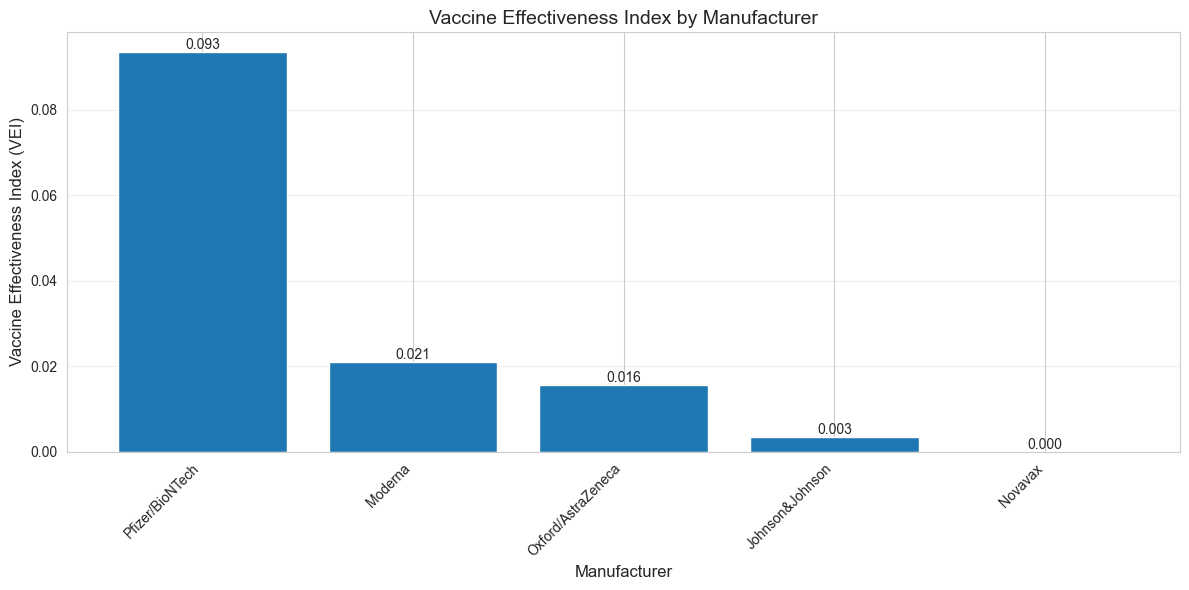

In [38]:
# Calculate and plot Vaccine Effectiveness Index by Manufacturer (from q3_final.ipynb)
latest_vax_data = vaccination_by_manufacturer.sort_values('date').groupby(['country', 'manufacturer']).last()
latest_vax_data = latest_vax_data.reset_index()

country_totals = latest_vax_data.groupby('country')['total_vaccinations'].sum()
latest_vax_data['vax_percentage'] = latest_vax_data.apply(
    lambda x: (x['total_vaccinations'] / country_totals[x['country']]) * 100, axis=1)

latest_testing_data = covid19_testing_record.sort_values('date').groupby('country').last()
latest_testing_data = latest_testing_data.reset_index()

population_data = vaccinations_by_country.sort_values('date').groupby('country').last()
population_data['estimated_population'] = population_data.apply(
    lambda x: x['people_vaccinated'] / (x['people_vaccinated_per_hundred'] / 100) if x['people_vaccinated_per_hundred'] > 0 else None, 
    axis=1)

latest_case_data = comprehensive_data.copy()

merged_data = latest_vax_data.merge(
    latest_testing_data[['country', 'positive_rate']], 
    on='country', 
    how='inner'
).merge(
    population_data[['estimated_population']], 
    left_on='country',
    right_index=True,
    how='inner'
).merge(
    latest_case_data[['country', 'confirmed_cases']],
    on='country',
    how='inner'
)

merged_data['infection_rate'] = merged_data['confirmed_cases'] / \
    merged_data['estimated_population'] * 100

max_infection_rate = merged_data['infection_rate'].max()

merged_data['vei'] = (1 - merged_data['infection_rate']/max_infection_rate) * (merged_data['vax_percentage']/100)

manufacturer_vei = merged_data.groupby('manufacturer').agg({
    'vei': lambda x: np.average(x, weights=merged_data.loc[x.index, 'total_vaccinations']),
    'total_vaccinations': 'sum'
}).sort_values('vei', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(manufacturer_vei.index, manufacturer_vei['vei'])

plt.title('Vaccine Effectiveness Index by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Vaccine Effectiveness Index (VEI)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

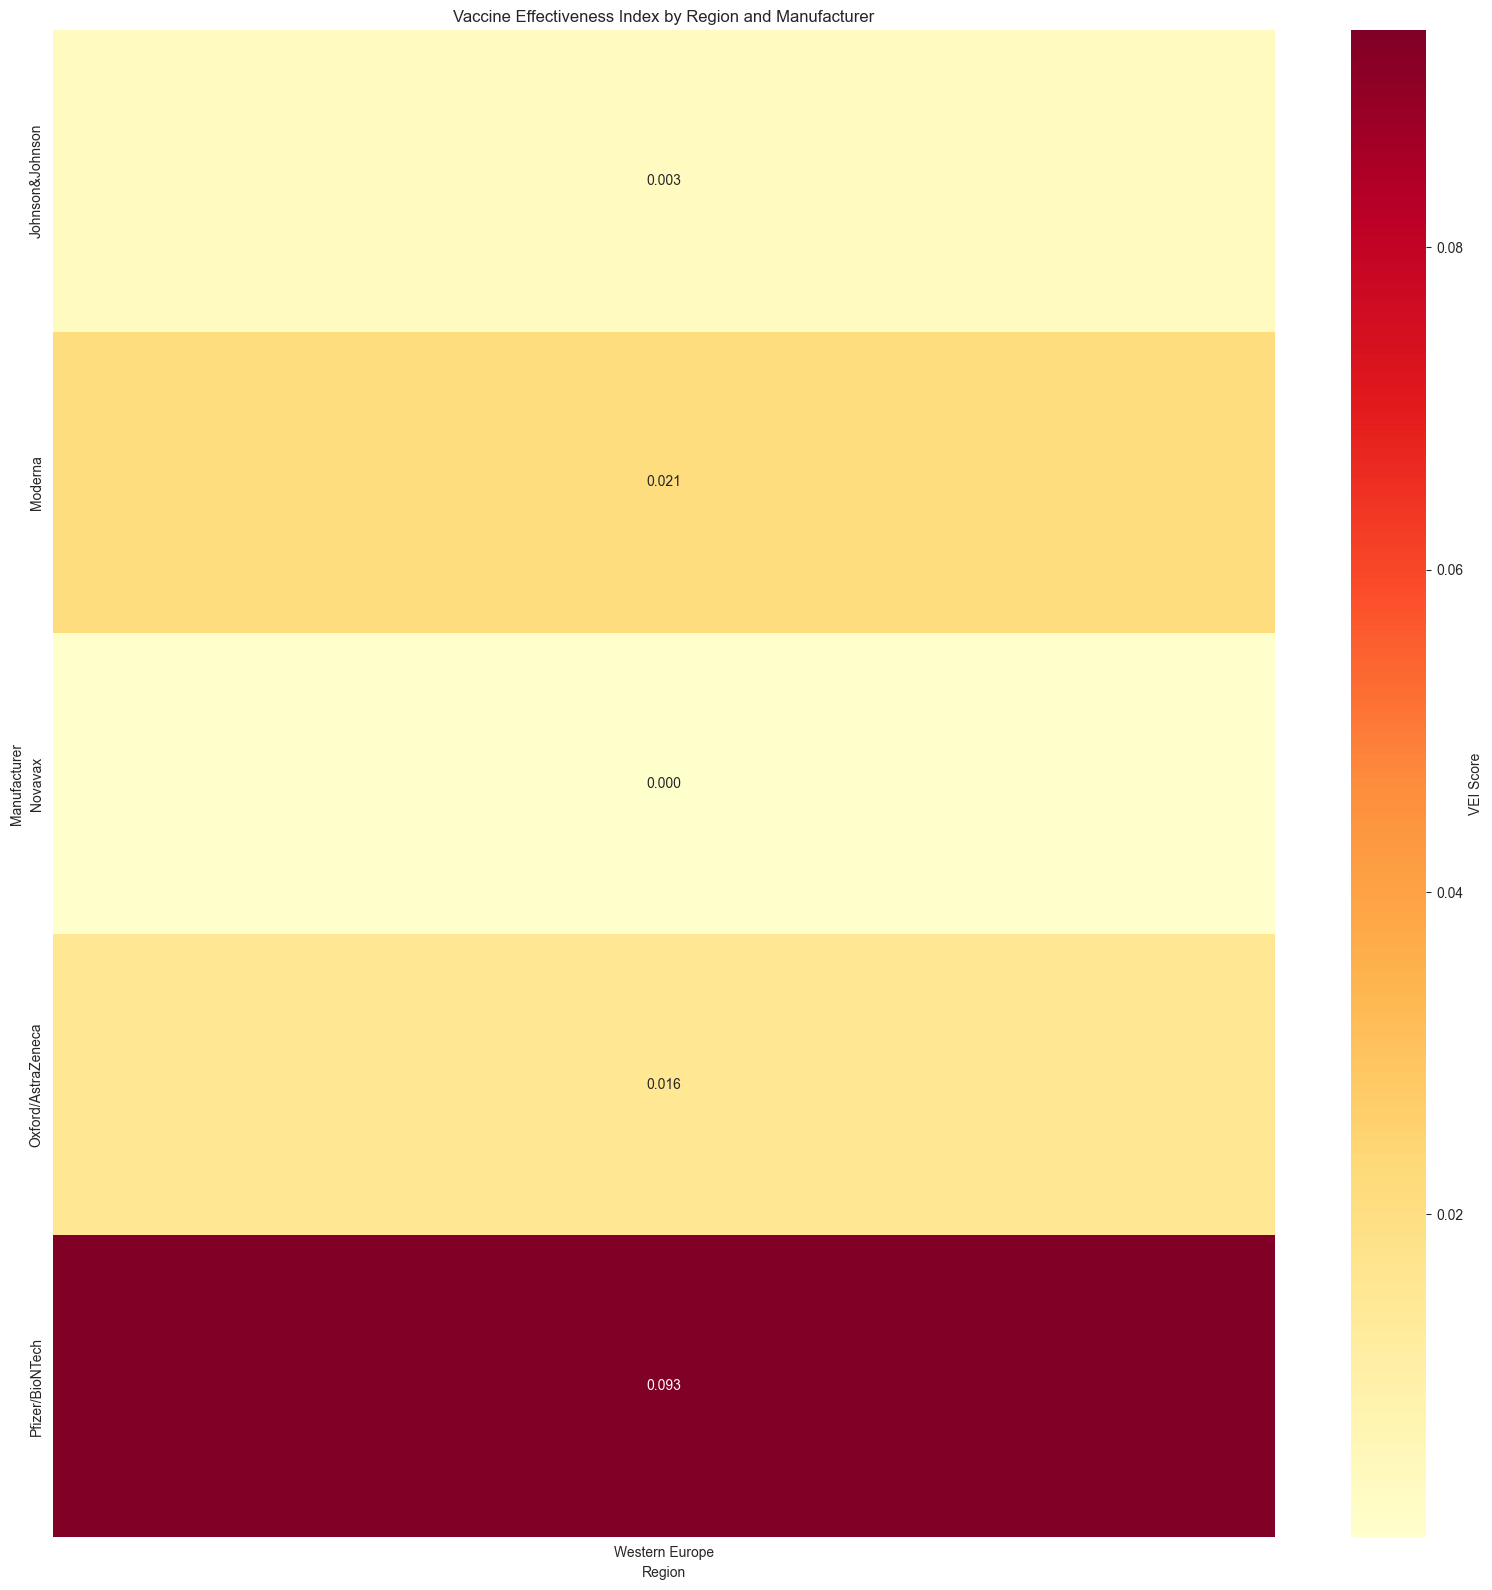

In [39]:
# Heatmap of Vaccine Effectiveness Index by Region and Manufacturer (from q3_final.ipynb)
merged_data['region'] = merged_data['country'].map(region_mapping)

region_vei = merged_data.groupby(['region', 'manufacturer']).agg({
    'vei': lambda x: np.average(x, weights=merged_data.loc[x.index, 'total_vaccinations']),
    'total_vaccinations': 'sum'
}).reset_index()

vei_pivot = region_vei.pivot(
    index='manufacturer', columns='region', values='vei')

fig, (ax1) = plt.subplots(1, 1, figsize=(16, 16))

sns.heatmap(vei_pivot,
            annot=True,
            fmt='.3f',
            cmap='YlOrRd',
            ax=ax1,
            cbar_kws={'label': 'VEI Score'})
ax1.set_title('Vaccine Effectiveness Index by Region and Manufacturer')
ax1.set_xlabel('Region')
ax1.set_ylabel('Manufacturer')

plt.tight_layout()
plt.show()

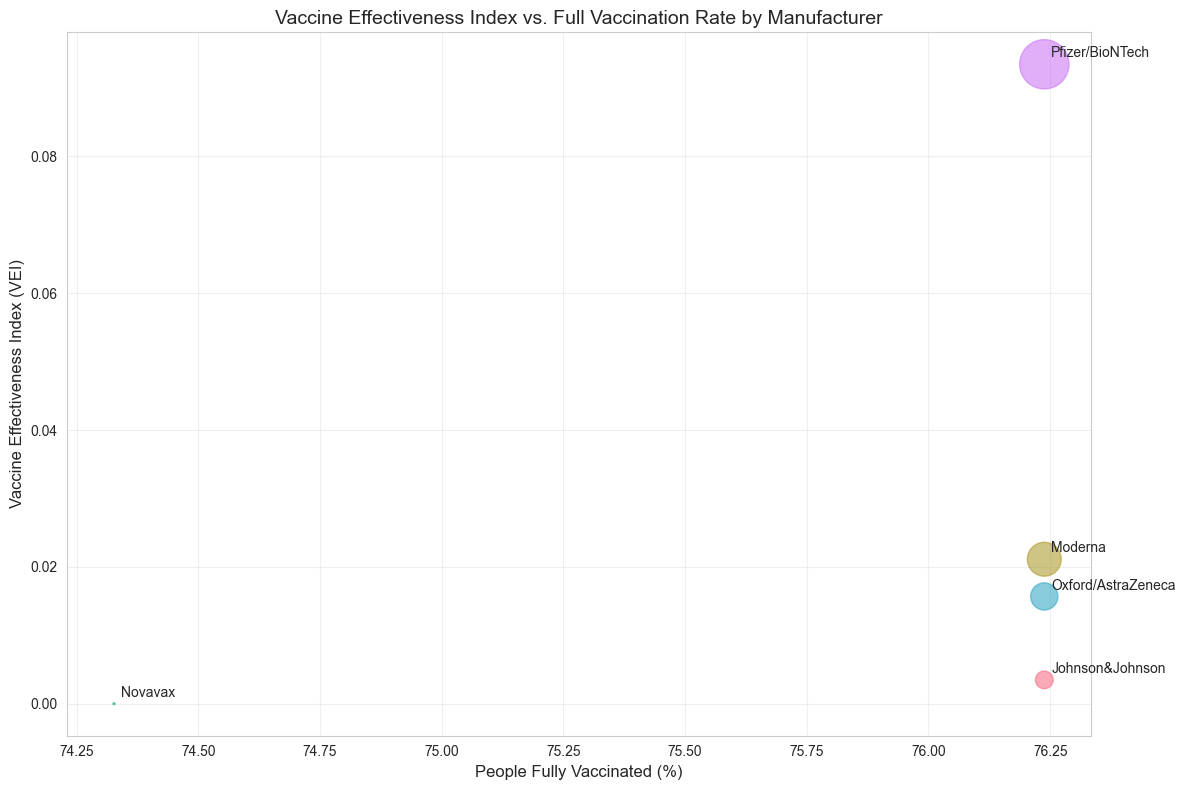

In [40]:
# Vaccine Effectiveness Index vs. Full Vaccination Rate by Manufacturer (Scatter Plot) (from q3_final.ipynb)
manufacturer_performance = merged_data.groupby('manufacturer').agg({
    'vei': lambda x: np.average(x, weights=merged_data.loc[x.index, 'total_vaccinations']),
    'total_vaccinations': 'sum'
}).reset_index()

latest_vaccination_data = vaccinations_by_country.sort_values('date').groupby('country').last()

manufacturer_vaccination_rates = latest_vax_data.merge(
    latest_vaccination_data[['people_fully_vaccinated_per_hundred']], 
    left_on='country', 
    right_index=True,
    how='inner'
).groupby('manufacturer').agg({
    'people_fully_vaccinated_per_hundred': 'mean'
}).reset_index()

manufacturer_performance = manufacturer_performance.merge(
    manufacturer_vaccination_rates,
    on='manufacturer',
    how='inner'
)

plt.figure(figsize=(12, 8))

scatter = plt.scatter(manufacturer_performance['people_fully_vaccinated_per_hundred'], 
                     manufacturer_performance['vei'],
                     s=manufacturer_performance['total_vaccinations'].apply(lambda x: np.sqrt(x/1e6)*100),
                     alpha=0.6,
                     c=[manufacturer_colors.get(m, 'gray') for m in manufacturer_performance['manufacturer']])

for idx, row in manufacturer_performance.iterrows():
    plt.annotate(row['manufacturer'], 
                (row['people_fully_vaccinated_per_hundred'], row['vei']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10)

plt.title('Vaccine Effectiveness Index vs. Full Vaccination Rate by Manufacturer', fontsize=14)
plt.xlabel('People Fully Vaccinated (%)', fontsize=12)
plt.ylabel('Vaccine Effectiveness Index (VEI)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_28232\2804878359.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_elements = [plt.scatter([], [], c=color, label=manufacturer)


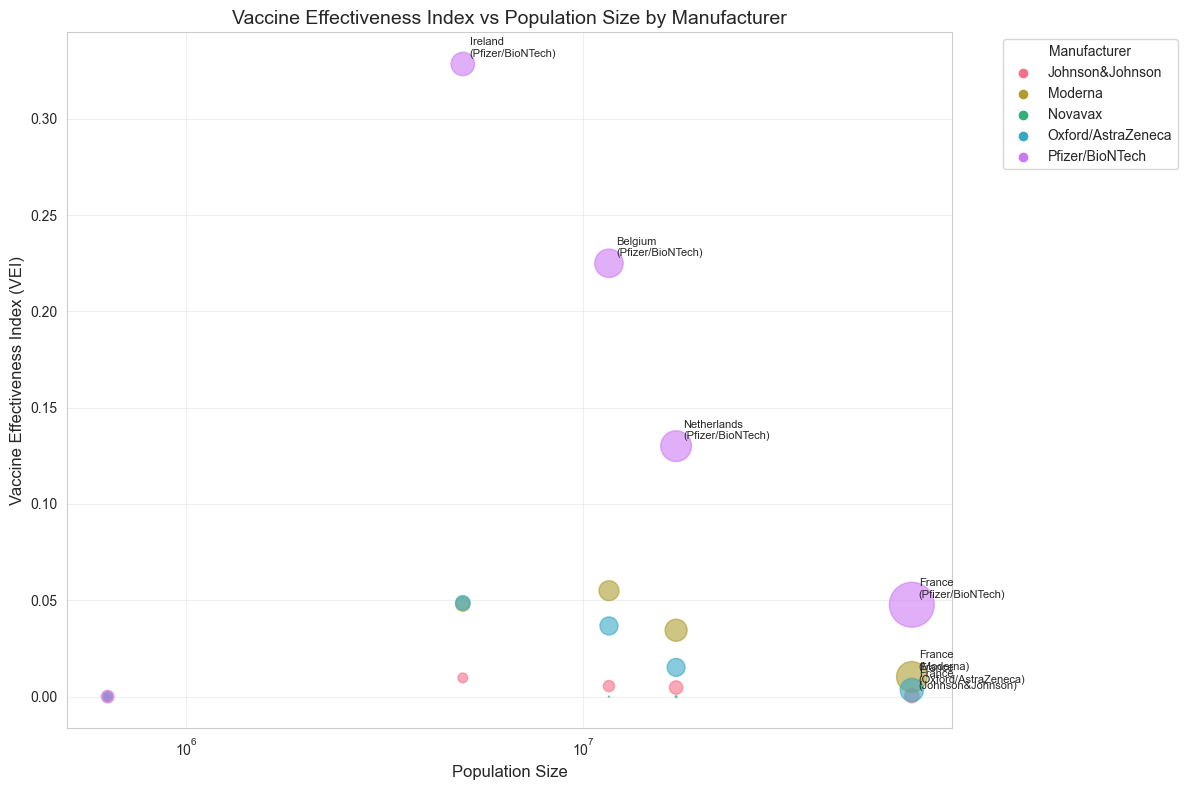

In [41]:
# Vaccine Effectiveness Index vs Population Size by Manufacturer (Scatter Plot) (from q3_final.ipynb)
plt.figure(figsize=(12, 8))

scatter = plt.scatter(merged_data['estimated_population'],
                      merged_data['vei'],
                      s=merged_data['total_vaccinations'].apply(
                          lambda x: np.sqrt(x/1e6)*100),
                      c=[manufacturer_colors.get(m, 'gray')
                         for m in merged_data['manufacturer']],
                      alpha=0.6)

threshold_vei = merged_data['vei'].mean() + merged_data['vei'].std()
threshold_pop = merged_data['estimated_population'].mean(
) + merged_data['estimated_population'].std()

for idx, row in merged_data.iterrows():
    if row['vei'] > threshold_vei or row['estimated_population'] > threshold_pop:
        plt.annotate(f"{row['country']}\n({row['manufacturer']})",
                     (row['estimated_population'], row['vei']),
                     xytext=(5, 5), textcoords='offset points',
                     fontsize=8)

plt.title(
    'Vaccine Effectiveness Index vs Population Size by Manufacturer', fontsize=14)
plt.xlabel('Population Size', fontsize=12)
plt.ylabel('Vaccine Effectiveness Index (VEI)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.xscale('log')

legend_elements = [plt.scatter([], [], c=color, label=manufacturer)
                   for manufacturer, color in manufacturer_colors.items()]
plt.legend(handles=legend_elements, title='Manufacturer',
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()